In [83]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [84]:
!pip install imbalanced-learn==0.12.3

In [85]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [86]:
!pip install shap
!pip install lime

In [87]:
import shap
import lime
import lime.lime_tabular

In [88]:
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, F1Score
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

In [89]:
hotels = pd.read_csv('/kaggle/input/international-hotel-booking-analytics/hotels.csv') 
reviews = pd.read_csv('/kaggle/input/international-hotel-booking-analytics/reviews.csv')
users = pd.read_csv('/kaggle/input/international-hotel-booking-analytics/users.csv')

hotels.rename(columns={'country': 'hotel_country'}, inplace=True)
users.rename(columns={'country': 'user_country'}, inplace=True)

df = hotels.merge(reviews, on='hotel_id').merge(users, on='user_id')


In [90]:
reviews.head()

review_id  user_id  hotel_id review_date  score_overall  score_cleanliness  \
0          1     1600         1  2022-10-07            8.7                8.6   
1          2      432         4  2020-03-24            9.1               10.0   
2          3      186        18  2023-12-18            8.8                9.7   
3          4     1403        19  2022-06-22            8.9                9.0   
4          5     1723        17  2022-07-02            9.1                8.9   

   score_comfort  score_facilities  score_location  score_staff  \
0            8.7               8.5             9.0          8.8   
1            9.1               9.0             8.6          9.4   
2            8.8               8.3             8.7          8.1   
3            8.8               8.5             9.6          9.1   
4            9.5               9.3             8.3          9.4   

   score_value_for_money                                        review_text  
0                    8.7  Practice reduce young our because machine. Rec...  
1                    8.6  Test cover traditional black. Process tell Mr ...  
2                    8.6  Friend million student social study yeah. Grow...  
3                    8.3  Huge girl already remain truth behind card. Ap...  
4                    8.9  Cover feeling call community serve television ...

In [91]:
hotels.head()

hotel_id         hotel_name      city         hotel_country  star_rating  \
0         1    The Azure Tower  New York         United States            5   
1         2  The Royal Compass    London        United Kingdom            5   
2         3    L'Étoile Palace     Paris                France            5   
3         4       Kyo-to Grand     Tokyo                 Japan            5   
4         5   The Golden Oasis     Dubai  United Arab Emirates            5   

       lat       lon  cleanliness_base  comfort_base  facilities_base  \
0  40.7580  -73.9855               9.1           8.8              8.9   
1  51.5072   -0.1276               9.0           9.2              8.8   
2  48.8566    2.3522               8.8           9.4              8.7   
3  35.6895  139.6917               9.6           9.0              9.3   
4  25.2769   55.2962               9.3           9.5              9.6   

   location_base  staff_base  value_for_money_base  
0            9.5         8.6                   8.0  
1            9.4         9.0                   7.9  
2            9.6         9.3                   8.1  
3            8.5         9.5                   8.2  
4            8.9         9.4                   8.5

In [92]:
df.head()

hotel_id       hotel_name      city  hotel_country  star_rating     lat  \
0         1  The Azure Tower  New York  United States            5  40.758   
1         1  The Azure Tower  New York  United States            5  40.758   
2         1  The Azure Tower  New York  United States            5  40.758   
3         1  The Azure Tower  New York  United States            5  40.758   
4         1  The Azure Tower  New York  United States            5  40.758   

       lon  cleanliness_base  comfort_base  facilities_base  ...  \
0 -73.9855               9.1           8.8              8.9  ...   
1 -73.9855               9.1           8.8              8.9  ...   
2 -73.9855               9.1           8.8              8.9  ...   
3 -73.9855               9.1           8.8              8.9  ...   
4 -73.9855               9.1           8.8              8.9  ...   

   score_facilities  score_location  score_staff  score_value_for_money  \
0               8.5             9.0          8.8                    8.7   
1               8.4             8.9          8.7                    8.4   
2               9.1             9.5          9.1                    7.5   
3               8.2             9.1          8.3                    8.4   
4               8.7             9.4          9.0                    7.4   

                                         review_text user_gender  \
0  Practice reduce young our because machine. Rec...      Female   
1  Summer leader sea. Civil morning operation amo...      Female   
2  Apply need explain movement wait above bar. Tu...        Male   
3  Soldier job southern back check. Fall check pu...       Other   
4  Various get next environment. This them positi...      Female   

     user_country  age_group  traveller_type   join_date  
0     New Zealand      25-34            Solo  2021-03-21  
1           Spain        55+            Solo  2023-10-05  
2       Australia      25-34        Business  2021-12-18  
3  United Kingdom      18-24          Couple  2023-02-02  
4    South Africa      35-44        Business  2024-12-10  

[5 rows x 29 columns]

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hotel_id               50000 non-null  int64  
 1   hotel_name             50000 non-null  object 
 2   city                   50000 non-null  object 
 3   hotel_country          50000 non-null  object 
 4   star_rating            50000 non-null  int64  
 5   lat                    50000 non-null  float64
 6   lon                    50000 non-null  float64
 7   cleanliness_base       50000 non-null  float64
 8   comfort_base           50000 non-null  float64
 9   facilities_base        50000 non-null  float64
 10  location_base          50000 non-null  float64
 11  staff_base             50000 non-null  float64
 12  value_for_money_base   50000 non-null  float64
 13  review_id              50000 non-null  int64  
 14  user_id                50000 non-null  int64  
 15  re

In [94]:
df.describe()

hotel_id  star_rating           lat           lon  \
count  50000.000000      50000.0  50000.000000  50000.000000   
mean      13.051100          5.0     20.882112     34.468497   
std        7.203808          0.0     30.437484     73.576721   
min        1.000000          5.0    -41.286500    -99.133200   
25%        7.000000          5.0      6.524400      2.173400   
50%       13.000000          5.0     31.230400     18.424100   
75%       19.000000          5.0     41.902800    100.501800   
max       25.000000          5.0     55.755800    174.776200   

       cleanliness_base  comfort_base  facilities_base  location_base  \
count      50000.000000  50000.000000     50000.000000   50000.000000   
mean           9.091592      9.063918         8.917196       9.270406   
std            0.226334      0.234129         0.286064       0.347649   
min            8.700000      8.600000         8.500000       8.500000   
25%            8.900000      8.900000         8.700000       9.000000   
50%            9.100000      9.100000         8.900000       9.300000   
75%            9.300000      9.200000         9.100000       9.600000   
max            9.600000      9.500000         9.600000       9.800000   

         staff_base  value_for_money_base     review_id       user_id  \
count  50000.000000          50000.000000  50000.000000  50000.000000   
mean       9.015730              8.513232  25000.500000   1005.567540   
std        0.236695              0.258259  14433.901067    576.711855   
min        8.600000              7.900000      1.000000      1.000000   
25%        8.800000              8.400000  12500.750000    507.000000   
50%        9.000000              8.500000  25000.500000   1010.000000   
75%        9.200000              8.700000  37500.250000   1504.000000   
max        9.500000              8.900000  50000.000000   2000.000000   

       score_overall  score_cleanliness  score_comfort  score_facilities  \
count   50000.000000       50000.000000   50000.000000      50000.000000   
mean        8.943460           9.052558       9.024404          8.743062   
std         0.180878           0.504296       0.423927          0.498320   
min         8.200000           7.700000       7.900000          7.600000   
25%         8.800000           8.700000       8.700000          8.400000   
50%         8.900000           9.100000       9.000000          8.700000   
75%         9.100000           9.400000       9.300000          9.100000   
max         9.600000          10.000000      10.000000         10.000000   

       score_location   score_staff  score_value_for_money  
count    50000.000000  50000.000000           50000.000000  
mean         9.176410      8.972076               8.434540  
std          0.421086      0.397775               0.529321  
min          7.900000      7.900000               6.800000  
25%          8.900000      8.700000               8.100000  
50%          9.200000      9.000000               8.500000  
75%          9.500000      9.200000               8.800000  
max         10.000000     10.000000               9.700000

## Finding null values and duplicates

In [95]:
df.isnull().sum()

hotel_id                 0
hotel_name               0
city                     0
hotel_country            0
star_rating              0
lat                      0
lon                      0
cleanliness_base         0
comfort_base             0
facilities_base          0
location_base            0
staff_base               0
value_for_money_base     0
review_id                0
user_id                  0
review_date              0
score_overall            0
score_cleanliness        0
score_comfort            0
score_facilities         0
score_location           0
score_staff              0
score_value_for_money    0
review_text              0
user_gender              0
user_country             0
age_group                0
traveller_type           0
join_date                0
dtype: int64

In [96]:
# Find duplicate rows
duplicates = df[df.duplicated(keep=False)]

if not duplicates.empty:
    print(f"Found {len(duplicates)} duplicate rows:")
    display(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


# Data engineering questions

## best city per traveller type

Family ->  Dubai ,
Solo -> Amsterdam ,
Couple -> Amsterdam ,
Business -> Dubai

In [97]:
# --- Analysis ---
#Group by traveler type and city, then calculate the average score.
# .reset_index() converts the grouped output back into a DataFrame.
avg_scores = df.groupby(['traveller_type', 'city'])['score_overall'].mean().reset_index()

# Find the best city for each traveler type.
# We sort the aggregated scores and then drop duplicates for each traveller_type,
# keeping the first entry, which will have the highest score.
best_cities = avg_scores.sort_values('score_overall', ascending=False).drop_duplicates('traveller_type')

print("--- Average Scores per City and Traveler Type ---")
print(avg_scores)
print("\n--- Best City Recommendation for Each Traveler Type ---")
print(best_cities)

--- Average Scores per City and Traveler Type ---
   traveller_type          city  score_overall
0        Business     Amsterdam       8.964348
1        Business       Bangkok       8.886265
2        Business     Barcelona       8.904545
3        Business        Berlin       8.868122
4        Business  Buenos Aires       8.690000
..            ...           ...            ...
95           Solo     Singapore       9.058916
96           Solo        Sydney       8.914286
97           Solo         Tokyo       8.973317
98           Solo       Toronto       9.045980
99           Solo    Wellington       9.027803

[100 rows x 3 columns]

--- Best City Recommendation for Each Traveler Type ---
   traveller_type       city  score_overall
57         Family      Dubai       9.214381
75           Solo  Amsterdam       9.108454
25         Couple  Amsterdam       9.096989
7        Business      Dubai       8.965668


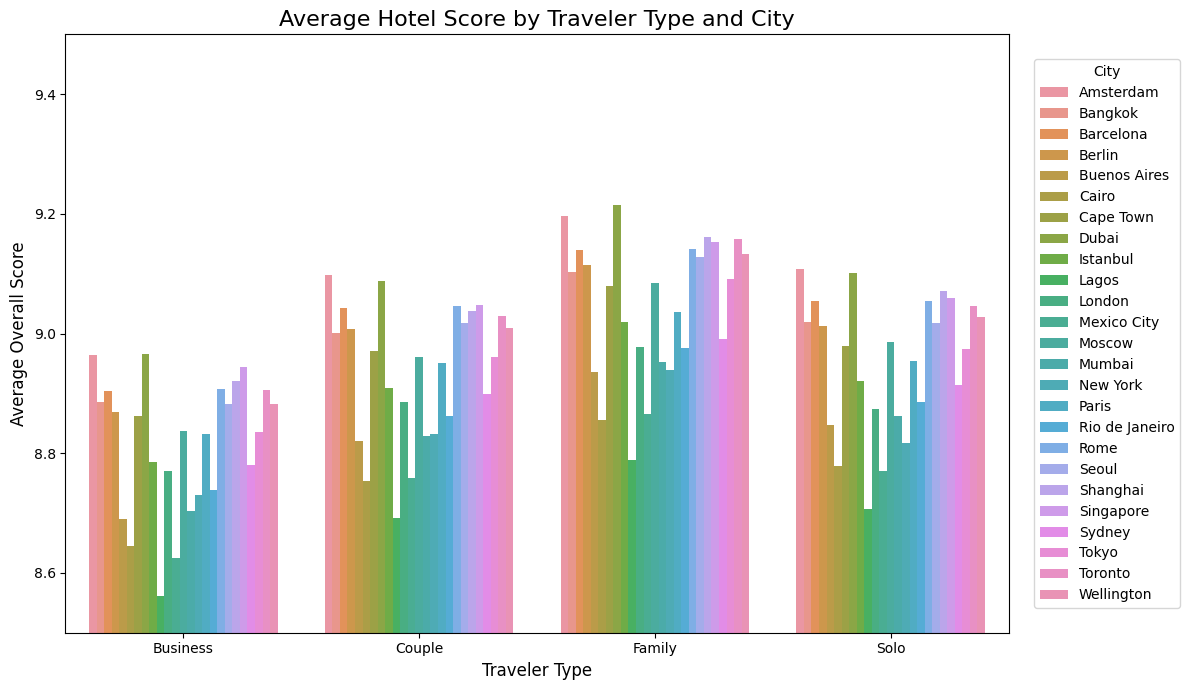

In [98]:
# Visualization
# Create a bar plot to visualize the average scores.
# Set the figure size for better readability.
plt.figure(figsize=(12, 7))

# Create the bar plot using seaborn.
# 'x' is the main category, 'y' is the value, and 'hue' creates separate bars for each city.
sns.barplot(data=avg_scores, x='traveller_type', y='score_overall', hue='city')

# Add titles and labels for clarity.
plt.title('Average Hotel Score by Traveler Type and City', fontsize=16)
plt.xlabel('Traveler Type', fontsize=12)
plt.ylabel('Average Overall Score', fontsize=12)
plt.xticks(rotation=0) # Keep the x-axis labels horizontal.
plt.legend(title='City', bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.ylim(bottom=8.5,top=9.5)

# Ensure the plot layout is neat.
plt.tight_layout()

plt.show()

## Best value for money countries per age group

18-24 -> China , 
25-34 -> China , 
35-44 -> China , 
45-54 -> China , 
55+ -> Netherlands

In [99]:

# Group by age_group and hotel_country, then calculate the mean score.
avg_scores = df.groupby(['age_group', 'hotel_country'])['score_value_for_money'].mean().reset_index()

# Sort the results first by age_group, then by the average score in descending order
# to prepare for ranking.
sorted_scores = avg_scores.sort_values(['age_group', 'score_value_for_money'], ascending=[True, False])

# For each age_group, select the top 3 entries from the sorted list.
top_3_countries = sorted_scores.groupby('age_group').head(3)

# Display the final result 
print("Top 3 Countries with Best Value-for-Money Score per Age Group:")
print(top_3_countries)

Top 3 Countries with Best Value-for-Money Score per Age Group:
    age_group hotel_country  score_value_for_money
4       18-24         China               8.706926
12      18-24   Netherlands               8.704911
3       18-24        Canada               8.661261
29      25-34         China               8.727941
37      25-34   Netherlands               8.683442
44      25-34         Spain               8.625074
54      35-44         China               8.700799
62      35-44   Netherlands               8.693268
63      35-44   New Zealand               8.646429
79      45-54         China               8.722112
88      45-54   New Zealand               8.674194
87      45-54   Netherlands               8.647458
112       55+   Netherlands               8.698537
113       55+   New Zealand               8.629384
104       55+         China               8.601000


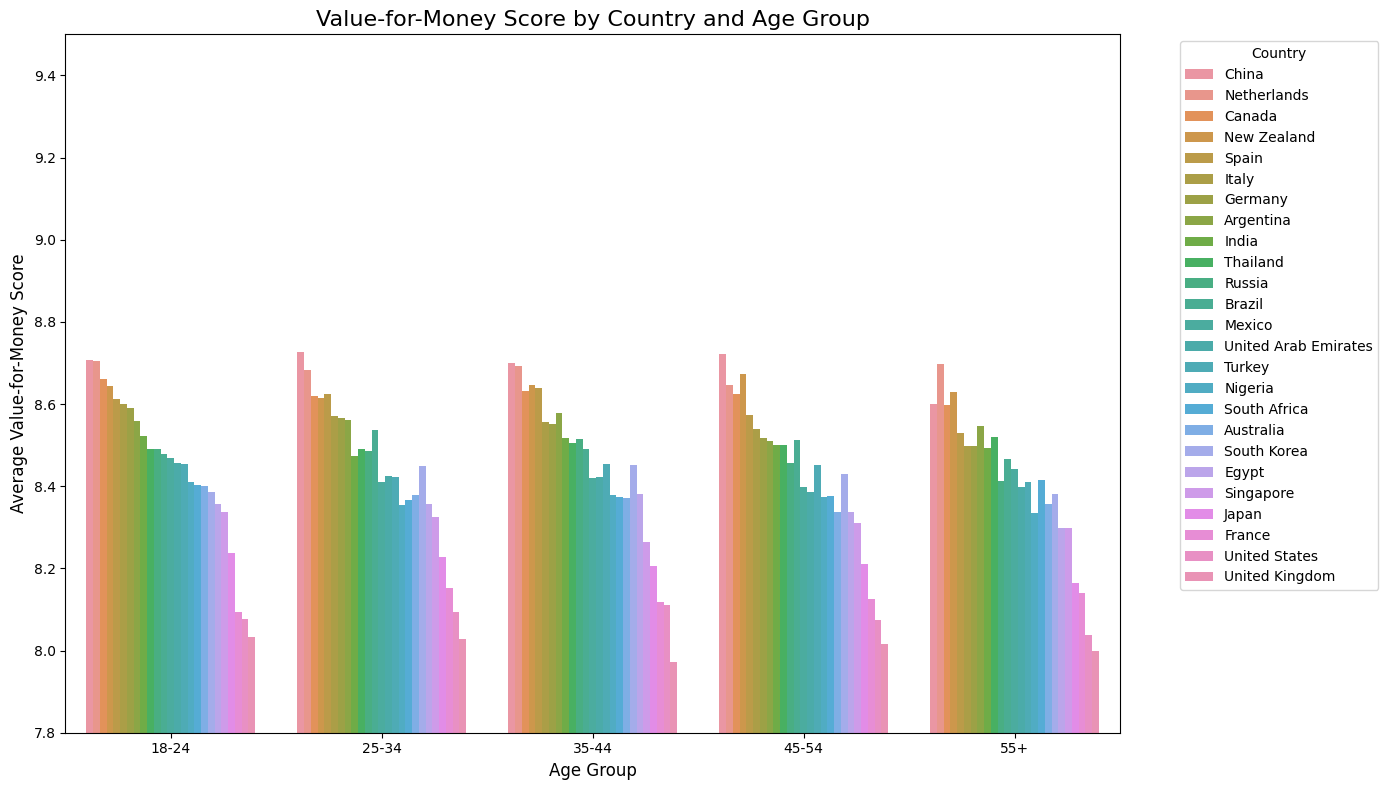

In [100]:
plt.figure(figsize=(14, 8))

sns.barplot(
    data=sorted_scores,
    x='age_group',
    y='score_value_for_money',
    hue='hotel_country' # This creates separate, colored bars for each country.
)

# Add informative titles and labels.
plt.title('Value-for-Money Score by Country and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Value-for-Money Score', fontsize=12)
plt.ylim(bottom=7.8,top=9.5)

# Move the legend outside the plot to prevent it from covering the bars.
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to make sure everything fits without overlapping.
plt.tight_layout()
plt.show()

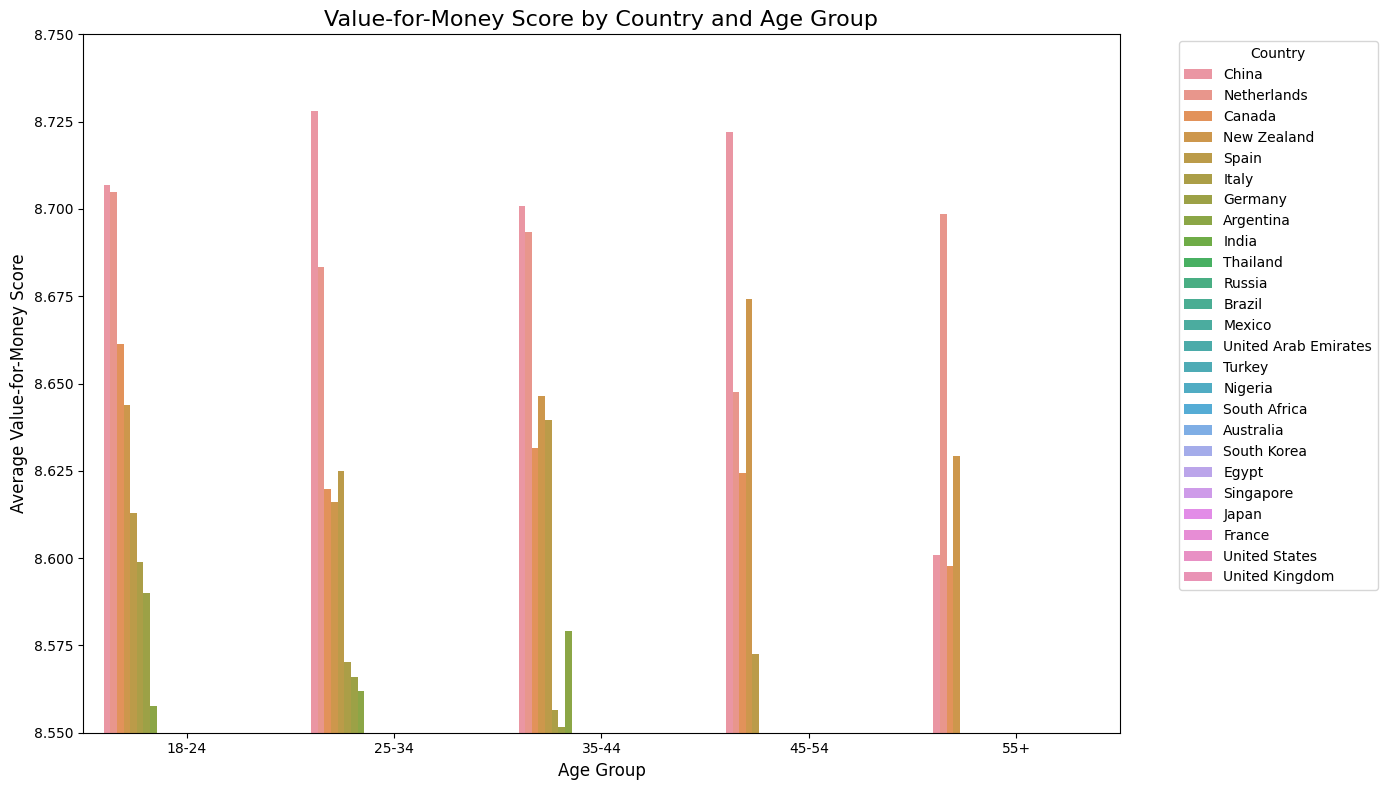

In [101]:
plt.figure(figsize=(14, 8))

sns.barplot(
    data=sorted_scores,
    x='age_group',
    y='score_value_for_money',
    hue='hotel_country' # This creates separate, colored bars for each country.
)

# Add informative titles and labels.
plt.title('Value-for-Money Score by Country and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Value-for-Money Score', fontsize=12)
plt.ylim(bottom=8.55,top=8.75)

# Move the legend outside the plot to prevent it from covering the bars.
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to make sure everything fits without overlapping.
plt.tight_layout()
plt.show()

# preparing for preditive model :
In this part of the notebook , we will investigate our data to find out what are the best features to choose for the model 

# 1- creating the country group coloumn 

In [102]:
# first step is creating the country_group coloumn 
# we have to map every hotel_country entry in the joined table to the correct country_group and add that to the entry so for intsance if the hotel country in the entry is US then the country group is north america

country_mapping = {
    # North America
    'United States': 'North_America',
    'Canada': 'North_America',
    
    # Western Europe
    'Germany': 'Western_Europe',
    'France': 'Western_Europe',
    'United Kingdom': 'Western_Europe',
    'Netherlands': 'Western_Europe',
    'Spain': 'Western_Europe',
    'Italy': 'Western_Europe',
    
    # Eastern Europe
    'Russia': 'Eastern_Europe',
    
    # Asia
    'China': 'East_Asia',
    'Japan': 'East_Asia',
    'South Korea': 'East_Asia',
    'Thailand': 'Southeast_Asia',
    'Singapore': 'Southeast_Asia',
    'United Arab Emirates': 'Middle_East',
    'Turkey': 'Middle_East',
    'India': 'South_Asia',
    
    # Africa
    'Egypt': 'Africa',
    'Nigeria': 'Africa',
    'South Africa': 'Africa',
    
    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    
    # South America
    'Brazil': 'South_America',
    'Argentina': 'South_America',
    
    # North America Mexico
    'Mexico': 'North_America_Mexico'
}

# Create the new column by mapping the 'hotel_country' column
df['country_group'] = df['hotel_country'].map(country_mapping)

# Check a few rows to ensure the mapping is correct
print(df[['hotel_country', 'country_group']].head())

# See the distribution of the newly created groups
print("\nDistribution of Country Groups:")
print(df['country_group'].value_counts())

print(df[['hotel_country', 'country_group']].tail())

   hotel_country  country_group
0  United States  North_America
1  United States  North_America
2  United States  North_America
3  United States  North_America
4  United States  North_America

Distribution of Country Groups:
country_group
Western_Europe          11876
Africa                   6132
East_Asia                6082
Southeast_Asia           4070
Oceania                  4014
Middle_East              3983
North_America            3962
South_America            3918
North_America_Mexico     2004
South_Asia               1989
Eastern_Europe           1970
Name: count, dtype: int64
      hotel_country country_group
49995   New Zealand       Oceania
49996   New Zealand       Oceania
49997   New Zealand       Oceania
49998   New Zealand       Oceania
49999   New Zealand       Oceania


From the distribution of the country groups , we can see that there is an imbalance in the data as western Europe alone accounts to 23.7% of the whole dataset while other country groups account for a maximum of 12.2% of the data like africa and this number can go as low as 3.9% like Eastern-Europe . I will explore methods to try and combat this imbalance later when I am training the model .

# 2 - Label encoding the age group 

In [103]:
# okay so now we want to do label encoding to age_group because I want to represent that an age group with older ages has a higher number in the label encoding   

# Get the unique categories from the 'age_group' column
age_group_categories = df['age_group'].unique()

# Print the result
print("The unique categories for the 'age_group' column are:")
print(age_group_categories)

The unique categories for the 'age_group' column are:
['25-34' '55+' '18-24' '35-44' '45-54']


In [104]:
# from sklearn.preprocessing import LabelEncoder

# 1. Initialize the LabelEncoder
label_encoder = LabelEncoder()

# 2. Fit the encoder to the data and transform the column
# This creates a new column with the numerical labels
df['age_group_encoded'] = label_encoder.fit_transform(df['age_group'])

# --- Verification ---
# Let's see the original and the new encoded column side-by-side
print("--- Original vs. Encoded Column ---")
print(df[['age_group', 'age_group_encoded']].head(10))

# so now we have label encoded the age_group coloumn

--- Original vs. Encoded Column ---
  age_group  age_group_encoded
0     25-34                  1
1       55+                  4
2     25-34                  1
3     18-24                  0
4     35-44                  2
5     45-54                  3
6     18-24                  0
7       55+                  4
8     35-44                  2
9     25-34                  1


# 3 - choosing the features for the predictive model 

In [105]:
# Find the number of unique values in 'star_rating'
unique_star_ratings = df['star_rating'].nunique()

print(f"Number of unique values in 'star_rating': {unique_star_ratings}")

# Also print the unique values themselves
unique_values = df['star_rating'].unique()
print(f"The unique values are: {unique_values}")

# I will not take star rating in my features for prediction as it is only one value for all hotels which is 5 stars 

Number of unique values in 'star_rating': 1
The unique values are: [5]


In [106]:
# Find the number of unique values in 'user_country'
unique_user_country = df['user_country'].nunique()

print(f"Number of unique values in 'user_country': {unique_user_country}")

# Also print the unique values themselves
unique_values = df['user_country'].unique()
print(f"The unique values are: {unique_values}")

# we will do one hot encoding for this feature when we are creating the model later

Number of unique values in 'user_country': 25
The unique values are: ['New Zealand' 'Spain' 'Australia' 'United Kingdom' 'South Africa'
 'United States' 'Canada' 'Argentina' 'Germany' 'China'
 'United Arab Emirates' 'Netherlands' 'France' 'Turkey' 'Thailand' 'India'
 'South Korea' 'Russia' 'Italy' 'Mexico' 'Japan' 'Brazil' 'Singapore'
 'Egypt' 'Nigeria']


In [107]:
# here we tried to compare the review date with the join date to know if the join date is the date of joining the app or the date of going to the hotel 
# we deduced that join date is the date the user joined the app because the review date is very far away from the join date 
print(df[["review_date", "join_date"]])

# but we found an anomaly that we need confirmation on 
# there are some entries in the table that the join_date in is after the review submission date

# Temporarily set pandas to display all columns without truncation
pd.set_option('display.max_columns', None)

# Print the second row of the DataFrame where i found the anomaly of the date 
print(df.iloc[1])

# reset the option afterward
pd.reset_option('display.max_columns')

# Ensure dates are in the correct format
df['review_date'] = pd.to_datetime(df['review_date'])
df['join_date'] = pd.to_datetime(df['join_date'])

# Count the rows where the condition is met
anomaly_count = (df['review_date'] < df['join_date']).sum()

print(f"The number of rows with the date anomaly is: {anomaly_count}")

# In conclusion :
# we won't take the dates with our prediction features because to represent the dates we have to add 3 coloumns (day , month , year) for join date and review date
# which adds dimensionality that isn't needed 
# another reason is the anomaly of some of the review dates being before the join dates 

      review_date   join_date
0      2022-10-07  2021-03-21
1      2021-01-18  2023-10-05
2      2020-12-04  2021-12-18
3      2023-06-17  2023-02-02
4      2020-09-06  2024-12-10
...           ...         ...
49995  2020-12-26  2023-09-05
49996  2020-06-14  2020-09-14
49997  2024-04-18  2022-07-12
49998  2025-08-06  2022-06-13
49999  2023-12-14  2024-02-09

[50000 rows x 2 columns]
hotel_id                                                                 1
hotel_name                                                 The Azure Tower
city                                                              New York
hotel_country                                                United States
star_rating                                                              5
lat                                                                 40.758
lon                                                               -73.9855
cleanliness_base                                                       9.1
comfort_base  

# The hotel identifiers problem :
there is a problem that we want to investigate regarding any base value in the hotels table .
the idea is that there are only 25 different hotels in the dataset and the 50k reviews are divided on those 25 hotels so any feature related to a specific hotel will act as a unique identifier to that hotel so that will make the model memorize the features which will cause overfitting .
To investigate this we will first use a heatmap to identify if there is a very high correlation between those base values and the country group .

Applying One-Hot Encoding to 'user_gender' and 'traveller_type' and 'user country'
Target variable 'country_group' encoded for the test.

Calculating correlation matrix and plotting heatmap...


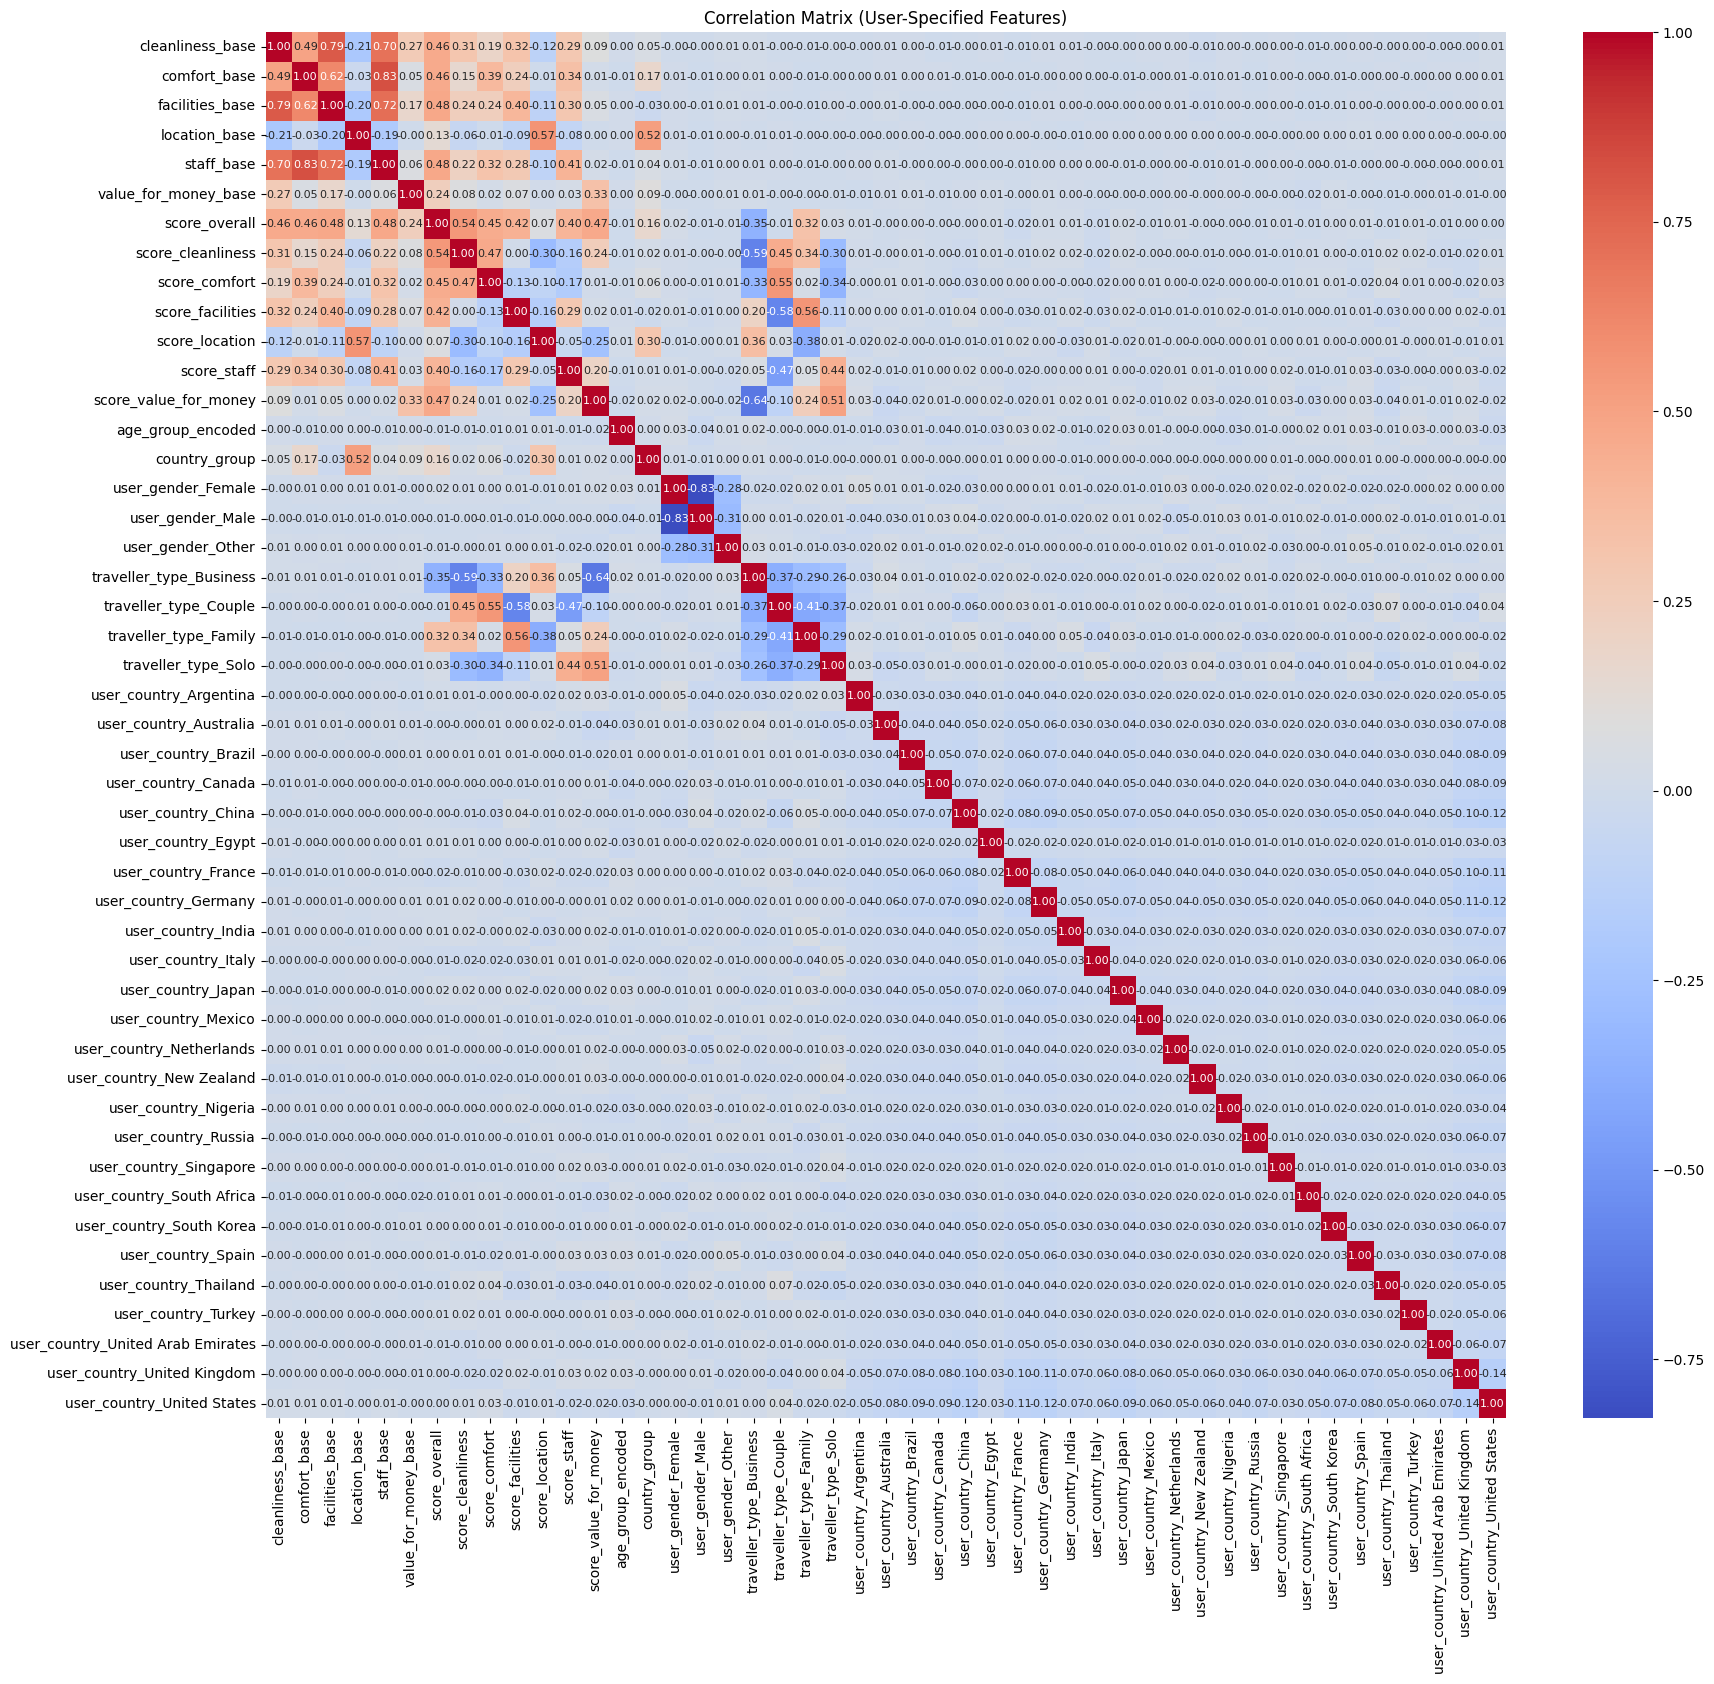



--- CORRELATION WITH TARGET (country_group) ---
country_group                        1.000000
location_base                        0.519075
score_location                       0.302788
comfort_base                         0.167844
score_overall                        0.160780
value_for_money_base                 0.091905
score_comfort                        0.061909
cleanliness_base                     0.049437
staff_base                           0.044185
score_value_for_money                0.021236
score_cleanliness                    0.016984
score_staff                          0.010192
traveller_type_Business              0.008706
user_country_Australia               0.008706
user_country_Spain                   0.008501
user_gender_Female                   0.005917
user_country_Singapore               0.005835
user_country_Egypt                   0.005297
age_group_encoded                    0.004409
user_country_France                  0.004399
user_country_Thailand         

In [108]:
# Select the feature list + the target 'country_group'
feature_list_for_corr = [
    'cleanliness_base', 'comfort_base', 'facilities_base', 
    'location_base', 'staff_base', 'value_for_money_base',
    'score_overall', 'score_cleanliness', 'score_comfort', 
    'score_facilities', 'score_location', 'score_staff', 
    'score_value_for_money','user_country',
    'user_gender', 'traveller_type', 'age_group_encoded',
    'country_group' 
]

# Create a new DataFrame for this test
df_corr_test = df[feature_list_for_corr].copy()

# One-Hot Encode user gender and traveller type
print("Applying One-Hot Encoding to 'user_gender' and 'traveller_type' and 'user country'")
df_corr_test = pd.get_dummies(df_corr_test, columns=['user_gender', 'traveller_type','user_country'] )

# Label Encode the target variable country group only for the corellation matrix 
le_target = LabelEncoder()
df_corr_test['country_group'] = le_target.fit_transform(df_corr_test['country_group'])
print("Target variable 'country_group' encoded for the test.")

# Calculate & Plot Heatmap
print("\nCalculating correlation matrix and plotting heatmap...")
corr_matrix = df_corr_test.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            annot_kws={"size": 8})
plt.title('Correlation Matrix (User-Specified Features)')
plt.show()

# 6. Print the sorted list (The most direct answer)
print("\n\n--- CORRELATION WITH TARGET (country_group) ---")
target_correlations = corr_matrix['country_group'].sort_values(ascending=False)
print(target_correlations)

From the correlation numbers , we can deduce that there is no suspecious correlation between the base values and the country group so we can't proof the problem by the heatmap so we will test another way .
The other way is creating a model ( either an FFNN or ML )  and training it one time with no base values and the other time with all the base values and see what happens with the accuracy , if the accuracy is very very high then maybe the problem is the hotel identifiers I talked about .

# conclusion :

1. we will not use any id coloumn so we will not use user ID , Review ID , Hotel ID beacuse they are arbitrary numbers and do not represent any meaning .
2. we will also not use join_date and review date .
3. we will also not use review text because the models that we will use ( either FFNN or ML ) do not process text and I can't do one hot encoding or label encoding for it .
4. we will also not use any feature that can lead the model to the actual location of the hotel like lat , lon , hotel country and city as giving those to the model will be like cheating .
5.  We will take all the features that had any corellation value other than zero ( negative or positive ) then we will test with the models to identify the best features to use from the rest of the features .



# ML MODEL

Feature set X_encoded created successfully.
Data scaled successfully.
Model training complete!

--- Accuracy Check ---
   Training Accuracy: 1.0000
   Testing Accuracy:  1.0000
--------------------------

--- Full Test Set Report ---
                      precision    recall  f1-score   support

              Africa       1.00      1.00      1.00      1238
           East_Asia       1.00      1.00      1.00      1304
      Eastern_Europe       1.00      1.00      1.00       395
         Middle_East       1.00      1.00      1.00       749
       North_America       1.00      1.00      1.00       817
North_America_Mexico       1.00      1.00      1.00       383
             Oceania       1.00      1.00      1.00       781
       South_America       1.00      1.00      1.00       805
          South_Asia       1.00      1.00      1.00       371
      Southeast_Asia       1.00      1.00      1.00       782
      Western_Europe       1.00      1.00      1.00      2375

            accuracy

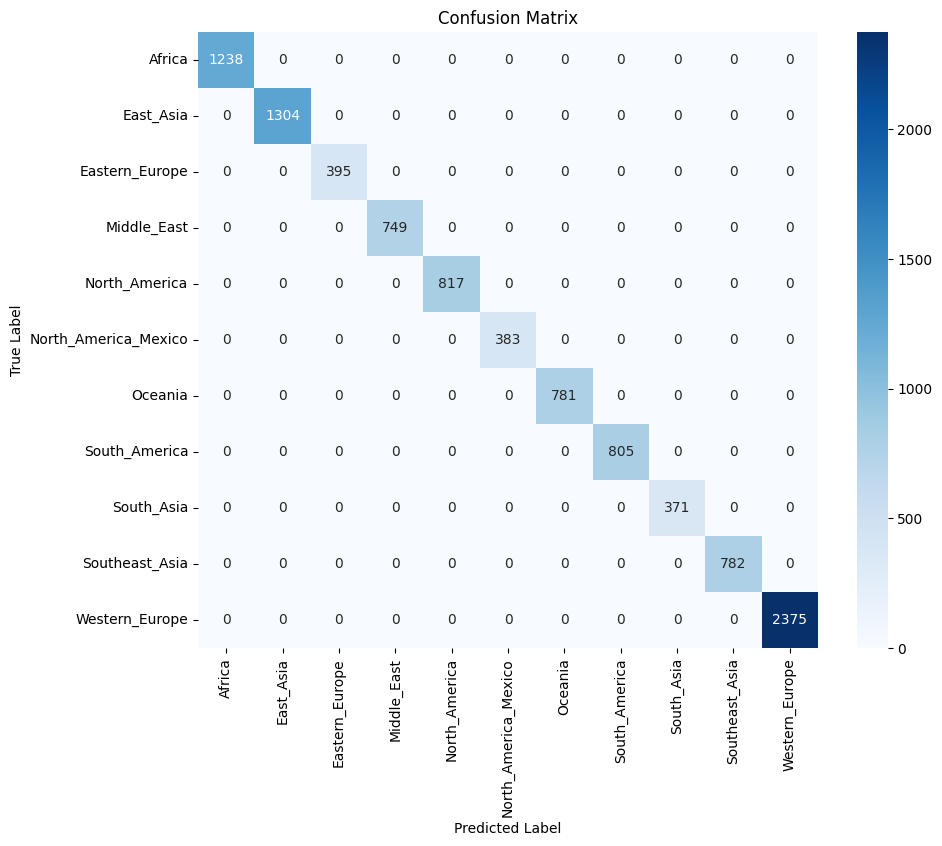

In [109]:
# Define the list of features for the model
feature_list = [
    'cleanliness_base', 'comfort_base', 'facilities_base', 
    'location_base', 'staff_base', 'value_for_money_base',
    'score_overall', 'score_cleanliness', 'score_comfort', 
    'score_facilities', 'score_location', 'score_staff', 
    'score_value_for_money','user_country',
    'user_gender', 'traveller_type', 'age_group_encoded'
]

# Create the feature DataFrame 'X'
X = df[feature_list].copy()

# One-Hot Encode 'gender' and 'traveller_type' and 'user_country'
X_encoded = pd.get_dummies(X, columns=['user_gender', 'traveller_type','user_country'], drop_first=True)

print("Feature set X_encoded created successfully.")

# Define Target Variable y 
y = df['country_group']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data scaled successfully.")

# Train the Model 
model = LogisticRegression(max_iter=1000, random_state=42 )
model.fit(X_train_scaled, y_train)
print("Model training complete!")



# Get accuracy on the Test set 
y_pred_test = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Get accuracy on the Training set
y_pred_train = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Print the comparison
print("\n--- Accuracy Check ---")
print(f"   Training Accuracy: {train_accuracy:.4f}")
print(f"   Testing Accuracy:  {test_accuracy:.4f}")
print("--------------------------")

# Print the full test report
print("\n--- Full Test Set Report ---")
print(classification_report(y_test, y_pred_test))

# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Feature set X_encoded created successfully.
Data scaled successfully.

Original training set shape: (40000, 43)
Resampled training set shape: (104511, 43)

Training data resampled successfully.
Model training complete!

--- Accuracy check (with Random Oversampling) ---
   Training Accuracy: 1.0000
   Testing Accuracy:  1.0000
--------------------------------------------------

--- Full Test Set Report (with Random Oversampling) ---
                      precision    recall  f1-score   support

              Africa       1.00      1.00      1.00      1238
           East_Asia       1.00      1.00      1.00      1304
      Eastern_Europe       1.00      1.00      1.00       395
         Middle_East       1.00      1.00      1.00       749
       North_America       1.00      1.00      1.00       817
North_America_Mexico       1.00      1.00      1.00       383
             Oceania       1.00      1.00      1.00       781
       South_America       1.00      1.00      1.00       805
     

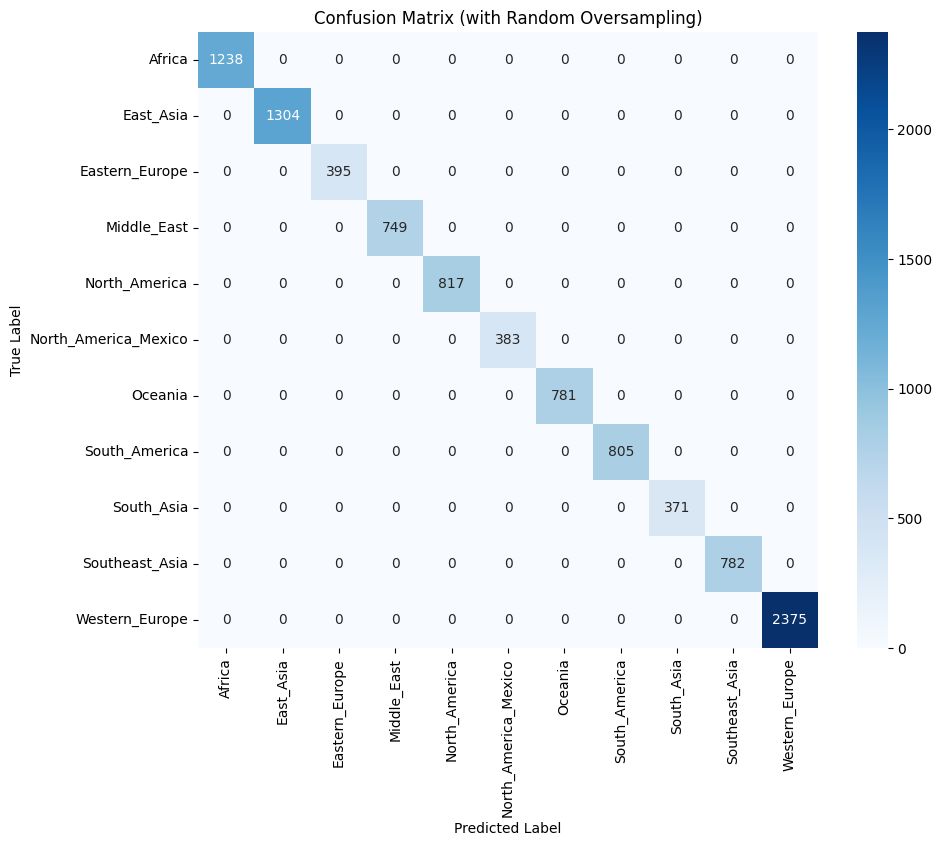

In [110]:

feature_list = [
    'cleanliness_base', 'comfort_base', 'facilities_base', 
    'location_base', 'staff_base', 'value_for_money_base',
    'score_overall', 'score_cleanliness', 'score_comfort', 
    'score_facilities', 'score_location', 'score_staff', 
    'score_value_for_money','user_country',
    'user_gender', 'traveller_type', 'age_group_encoded' 
]


X = df[feature_list].copy()

# One-Hot Encode 'gender' and 'traveller_type' and 'user_country'
X_encoded = pd.get_dummies(X, columns=['user_gender', 'traveller_type','user_country'], drop_first=True)

print("Feature set X_encoded created successfully.")

# Define Target Variable y 
y = df['country_group']

# Split the Data (Original Split) 
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data scaled successfully.")

# Apply Random Oversampling
# Apply only to the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

print(f"\nOriginal training set shape: {X_train_scaled.shape}")
print(f"Resampled training set shape: {X_train_resampled.shape}")
print("\nTraining data resampled successfully.")

# Train the Model
# Train on the resampled data 
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
print("Model training complete!")


# Get accuracy on the Test set (using original X_test_scaled)
y_pred_test = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Get accuracy on the Training set (using resampled training data)
y_pred_train = model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_pred_train)

# Print the comparison
print("\n--- Accuracy check (with Random Oversampling) ---")
print(f"   Training Accuracy: {train_accuracy:.4f}")
print(f"   Testing Accuracy:  {test_accuracy:.4f}")
print("--------------------------------------------------")

# Print the full test report
print("\n--- Full Test Set Report (with Random Oversampling) ---")
print(classification_report(y_test, y_pred_test, zero_division=0))

# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (with Random Oversampling)')
plt.show()

The previous model scored 100% in every type of evaluation and it scored 1.00 in test accuracy and training accuracy which is a proof that data leakage happened that caused the model overfitting .
I also tried the model with over sampling just to make sure that the results won't change .

Feature set for Model 2 created successfully.
Data for Model 2 scaled successfully.
Model 2 training complete!

--- Model 2: Accuracy comparison ---
   Training Accuracy: 0.3420
   Testing Accuracy:  0.3454
---------------------------------

--- Model 2: Full Test Set Report ---
                      precision    recall  f1-score   support

              Africa       0.30      0.48      0.37      1238
           East_Asia       0.37      0.45      0.41      1304
      Eastern_Europe       0.27      0.04      0.07       395
         Middle_East       0.21      0.05      0.09       749
       North_America       0.20      0.08      0.12       817
North_America_Mexico       0.31      0.09      0.14       383
             Oceania       1.00      0.00      0.00       781
       South_America       0.33      0.22      0.26       805
          South_Asia       0.33      0.00      0.01       371
      Southeast_Asia       0.38      0.18      0.25       782
      Western_Europe       0.37      

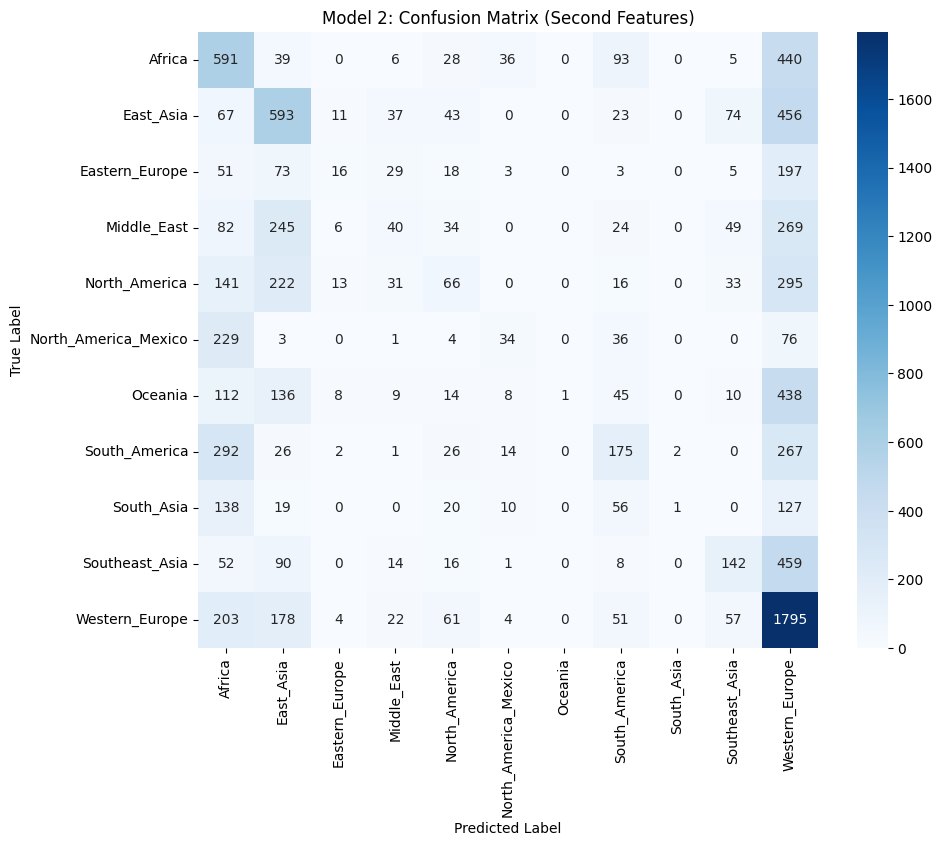

In [111]:
# Define the second Feature List
feature_list_2 = [
    'score_overall', 'score_cleanliness', 'score_comfort', 
    'score_facilities', 'score_location', 'score_staff', 
    'score_value_for_money','user_country',
    'user_gender', 'traveller_type', 'age_group_encoded' 
]

# Create the feature DataFrame 'X' 
X_model_2 = df[feature_list_2].copy()

# One-Hot Encode 'user_gender' and 'traveller_type' and 'user country' 
X_model_2_encoded = pd.get_dummies(X_model_2, columns=['user_gender', 'traveller_type','user_country'], drop_first=True)
print("Feature set for Model 2 created successfully.")

#  Define Target Variable y 
y = df['country_group'] # 'y' is the same as before

# Split the Data for Model 2 
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_model_2_encoded, y, test_size=0.2, random_state=42)

# Scale the Data for Model 2
scaler_2 = StandardScaler()
X_train_scaled_2 = scaler_2.fit_transform(X_train_2)
X_test_scaled_2 = scaler_2.transform(X_test_2)
print("Data for Model 2 scaled successfully.")

# Train Model 2
model_2 = LogisticRegression(max_iter=1000, random_state=42 )
model_2.fit(X_train_scaled_2, y_train_2)
print("Model 2 training complete!")

# Get accuracy on the Test set
y_pred_test_2 = model_2.predict(X_test_scaled_2)
test_accuracy_2 = accuracy_score(y_test_2, y_pred_test_2)

# Get accuracy on the Training set
y_pred_train_2 = model_2.predict(X_train_scaled_2)
train_accuracy_2 = accuracy_score(y_train_2, y_pred_train_2)

# Print the comparison
print("\n--- Model 2: Accuracy comparison ---")
print(f"   Training Accuracy: {train_accuracy_2:.4f}")
print(f"   Testing Accuracy:  {test_accuracy_2:.4f}")
print("---------------------------------")

# Print the full test report
print("\n--- Model 2: Full Test Set Report ---")
print(classification_report(y_test_2, y_pred_test_2, zero_division=0))

# Plot the Confusion Matrix
cm_2 = confusion_matrix(y_test_2, y_pred_test_2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_2, annot=True, fmt="d", cmap='Blues', 
            xticklabels=model_2.classes_, yticklabels=model_2.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Model 2: Confusion Matrix (Second Features)')
plt.show()

This is the second model where I removed all the base scores . we can see that the accuracy is far less than before but now it is realistic and there is no overfitting .
Next step is to try and make this model better than this .

Feature set for Model 2 created successfully.
Data for Model 2 scaled successfully.

Original training set shape: (40000, 37)
Resampled training set shape: (104511, 37)
Training data resampled successfully.
Model 2 training complete!

--- Model 2: Accuracy Comparison (with Random Oversampling) ---
   Training Accuracy: 0.2557
   Testing Accuracy:  0.2417
---------------------------------------------------------

--- Model 2: Full Test Set Report (with Random Oversampling) ---
                      precision    recall  f1-score   support

              Africa       0.24      0.14      0.18      1238
           East_Asia       0.39      0.35      0.37      1304
      Eastern_Europe       0.12      0.30      0.17       395
         Middle_East       0.22      0.13      0.17       749
       North_America       0.17      0.19      0.18       817
North_America_Mexico       0.17      0.46      0.25       383
             Oceania       0.11      0.09      0.09       781
       South_America  

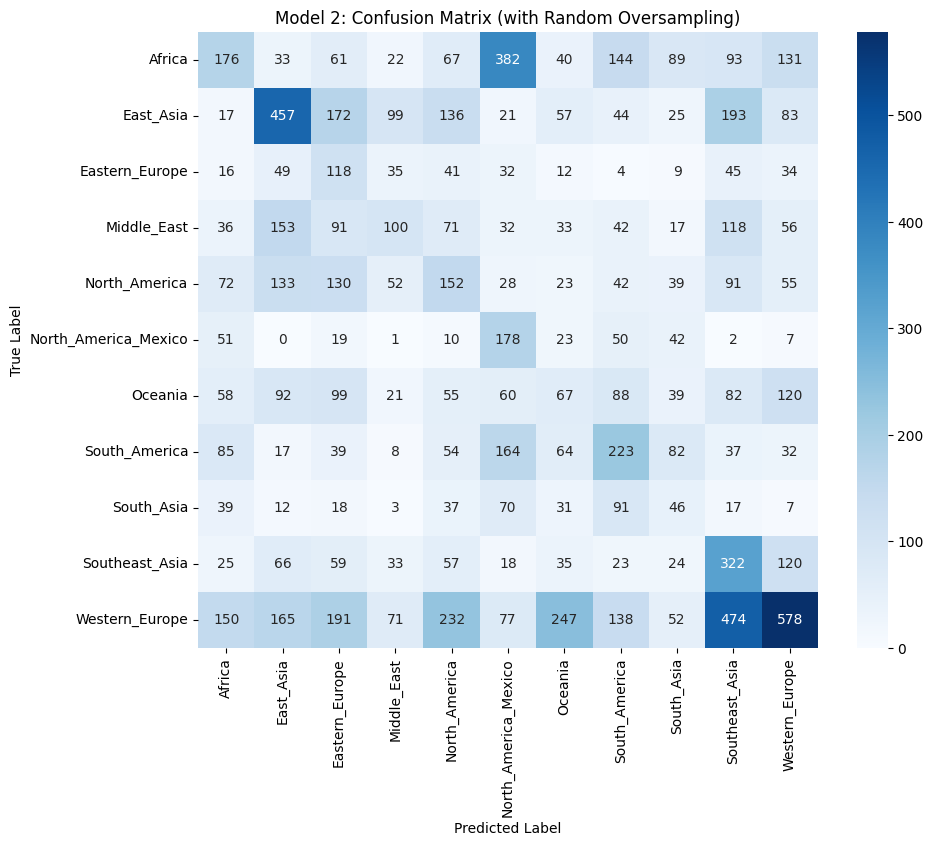

In [112]:

feature_list_2 = [
    'score_overall', 'score_cleanliness', 'score_comfort', 
    'score_facilities', 'score_location', 'score_staff', 
    'score_value_for_money','user_country',
    'user_gender', 'traveller_type', 'age_group_encoded' 
]


X_model_2 = df[feature_list_2].copy()


X_model_2_encoded = pd.get_dummies(X_model_2, columns=['user_gender', 'traveller_type','user_country'], drop_first=True)
print("Feature set for Model 2 created successfully.")


y = df['country_group']


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_model_2_encoded, y, test_size=0.2, random_state=42)


scaler_2 = StandardScaler()
X_train_scaled_2 = scaler_2.fit_transform(X_train_2)
X_test_scaled_2 = scaler_2.transform(X_test_2)
print("Data for Model 2 scaled successfully.")

# APPLY RANDOM OVERSAMPLING 
ros = RandomOverSampler(random_state=42)
X_train_resampled_2, y_train_resampled_2 = ros.fit_resample(X_train_scaled_2, y_train_2)

print(f"\nOriginal training set shape: {X_train_scaled_2.shape}")
print(f"Resampled training set shape: {X_train_resampled_2.shape}")
print("Training data resampled successfully.")

# Train Model 2 
# Train on the resampled data 
model_2 = LogisticRegression(max_iter=1000, random_state=42)
model_2.fit(X_train_resampled_2, y_train_resampled_2)
print("Model 2 training complete!")

# Get accuracy on the Test set (use original test set)
y_pred_test_2 = model_2.predict(X_test_scaled_2)
test_accuracy_2 = accuracy_score(y_test_2, y_pred_test_2)

# Get accuracy on the Training set (use resampled training set)
y_pred_train_2 = model_2.predict(X_train_resampled_2)
train_accuracy_2 = accuracy_score(y_train_resampled_2, y_pred_train_2)

# Print the comparison
print("\n--- Model 2: Accuracy Comparison (with Random Oversampling) ---")
print(f"   Training Accuracy: {train_accuracy_2:.4f}")
print(f"   Testing Accuracy:  {test_accuracy_2:.4f}")
print("---------------------------------------------------------")

# Print the full test report
print("\n--- Model 2: Full Test Set Report (with Random Oversampling) ---")
print(classification_report(y_test_2, y_pred_test_2, zero_division=0))

# Plot the Confusion Matrix
cm_2 = confusion_matrix(y_test_2, y_pred_test_2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_2, annot=True, fmt="d", cmap='Blues', 
            xticklabels=model_2.classes_, yticklabels=model_2.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Model 2: Confusion Matrix (with Random Oversampling)')
plt.show()

This is the same model as the second one but now I have applied random oversampling which duplicates random samples from minority classes to balance the inbalance in the dataset But as can be seen in the results that the accuracy got worse after oversampling . 

Feature set for Model 2 created successfully.
Saved column order for inference function.
Data for Model 2 scaled successfully.

Original training set shape: (40000, 37)
Resampled training set shape: (17325, 37)
Training data resampled successfully.
Model 2 training complete!

--- Model 2: accuracy comparison (with Random Under-sampling) ---
   Training Accuracy: 0.2623
   Testing Accuracy:  0.2445
---------------------------------------------------------

--- Model 2: Full Test Set Report (with Random Under-sampling) ---
                      precision    recall  f1-score   support

              Africa       0.24      0.14      0.18      1238
           East_Asia       0.40      0.35      0.38      1304
      Eastern_Europe       0.12      0.30      0.17       395
         Middle_East       0.22      0.14      0.17       749
       North_America       0.17      0.19      0.18       817
North_America_Mexico       0.17      0.45      0.24       383
             Oceania       0.10      0

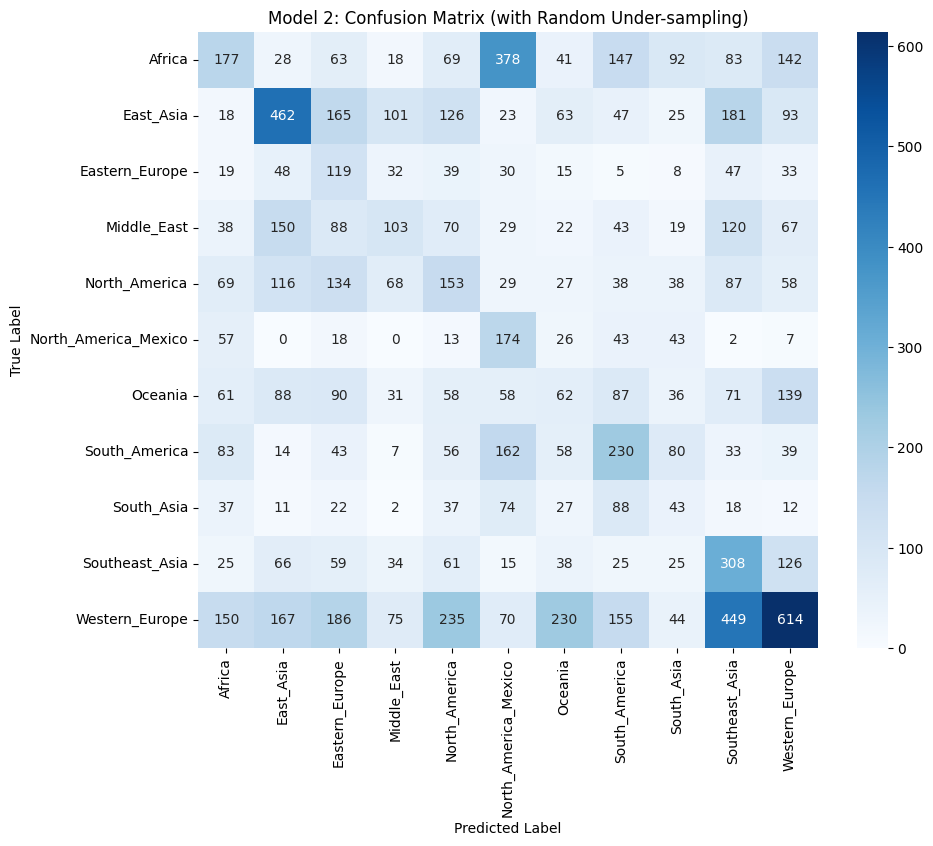

In [113]:
# Define the second Feature List
feature_list_2 = [
    'score_overall', 'score_cleanliness', 'score_comfort', 
    'score_facilities', 'score_location', 'score_staff', 
    'score_value_for_money','user_country',
    'user_gender', 'traveller_type', 'age_group_encoded' 
]

# Create the feature DataFrame 'X' 
X_model_2 = df[feature_list_2].copy()

# One-Hot Encode 'user_gender' and 'traveller_type' and 'user_country' 
X_model_2_encoded = pd.get_dummies(X_model_2, columns=['user_gender', 'traveller_type','user_country'], drop_first=True)
print("Feature set for Model 2 created successfully.")

# added this line because we will need later in the infernece function
X_encoded_columns_model2 = X_model_2_encoded.columns.tolist() 
print("Saved column order for inference function.")

#  Define Target Variable y 
y = df['country_group'] # 'y' is the same as before

# Split the Data for Model 2 
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_model_2_encoded, y, test_size=0.2, random_state=42)

# Scale the Data for Model 2
scaler_2 = StandardScaler()
X_train_scaled_2 = scaler_2.fit_transform(X_train_2)
X_test_scaled_2 = scaler_2.transform(X_test_2)
print("Data for Model 2 scaled successfully.")

# APPLY RANDOM UNDER-SAMPLING 
rus = RandomUnderSampler(random_state=42)
X_train_resampled_2, y_train_resampled_2 = rus.fit_resample(X_train_scaled_2, y_train_2)

print(f"\nOriginal training set shape: {X_train_scaled_2.shape}")
print(f"Resampled training set shape: {X_train_resampled_2.shape}") # <-- This will be much smaller
print("Training data resampled successfully.")

# Train Model 2 
# Train on the resampled data
model_2 = LogisticRegression(max_iter=1000, random_state=42)
model_2.fit(X_train_resampled_2, y_train_resampled_2)
print("Model 2 training complete!")

# Get accuracy on the Test set (use original test set)
y_pred_test_2 = model_2.predict(X_test_scaled_2)
test_accuracy_2 = accuracy_score(y_test_2, y_pred_test_2)

# Get accuracy on the Training set (use resampled training set)
y_pred_train_2 = model_2.predict(X_train_resampled_2)
train_accuracy_2 = accuracy_score(y_train_resampled_2, y_pred_train_2)

# Print the comparison
print("\n--- Model 2: accuracy comparison (with Random Under-sampling) ---")
print(f"   Training Accuracy: {train_accuracy_2:.4f}")
print(f"   Testing Accuracy:  {test_accuracy_2:.4f}")
print("---------------------------------------------------------")

# Print the full test report
print("\n--- Model 2: Full Test Set Report (with Random Under-sampling) ---")
print(classification_report(y_test_2, y_pred_test_2, zero_division=0))

# Plot the Confusion Matrix
cm_2 = confusion_matrix(y_test_2, y_pred_test_2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_2, annot=True, fmt="d", cmap='Blues', 
            xticklabels=model_2.classes_, yticklabels=model_2.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Model 2: Confusion Matrix (with Random Under-sampling)')
plt.show()

This is the same model as the second one but now I have applied random undersampling which removes random samples from majority classes to balance the inbalance in the dataset But as can be seen in the results that the accuracy got worse after Undersampling . 

# I think this is the part where we have to question what is a good metric to evaluate if the model is good or not 
When evaluating our model, "Accuracy" alone can be misleading. Our dataset has a significant class imbalance, with the largest class ('Western_Europe') being almost six times larger than the smallest ones. A model could get a decent accuracy just by always guessing the majority class.
Therefore, the weighted avg F1-score is a much better metric for us. The F1-score provides a balance between Precision and Recall .

Based on the choice that we will evaluate if our model is good or not based on weighted f1 score then if we compare the results of weighted f1 scores 

* with no resampling : 0.28
* with random oversampling : 0.24
* with random undersampling : 0.25

Based on the above f1 scores , we will choose not to do any oversampling or undersampling and leave the data as it is as the scores were higher then .

After proving that the base values were a cause of data leakage , we want to somehow use them in the model but indirectly so that we can benifit from the extra information without cheating 

so here is an idea 

what if we can get the differnece between a base value and the score given by the traveller in each category and then use those new features as predictors instead of the scores we are currently using and with this method , we could be in theory emvedding information from 2 features into 1 coloumn 

New 'delta' features created successfully.
Feature set for Model 3 created successfully.
Data for Model 3 scaled successfully.
Model 3 (Delta Features) training complete!

--- Model 3: Overfitting Check (Delta Features) ---
   Training Accuracy: 0.2659
   Testing Accuracy:  0.2652
-------------------------------------------------

--- Model 3: Full Test Set Report (Delta Features) ---
                      precision    recall  f1-score   support

              Africa       0.24      0.31      0.27      1238
           East_Asia       0.26      0.24      0.25      1304
      Eastern_Europe       0.00      0.00      0.00       395
         Middle_East       0.17      0.00      0.01       749
       North_America       0.12      0.00      0.01       817
North_America_Mexico       0.20      0.00      0.01       383
             Oceania       0.00      0.00      0.00       781
       South_America       0.21      0.02      0.03       805
          South_Asia       0.00      0.00      0.00  

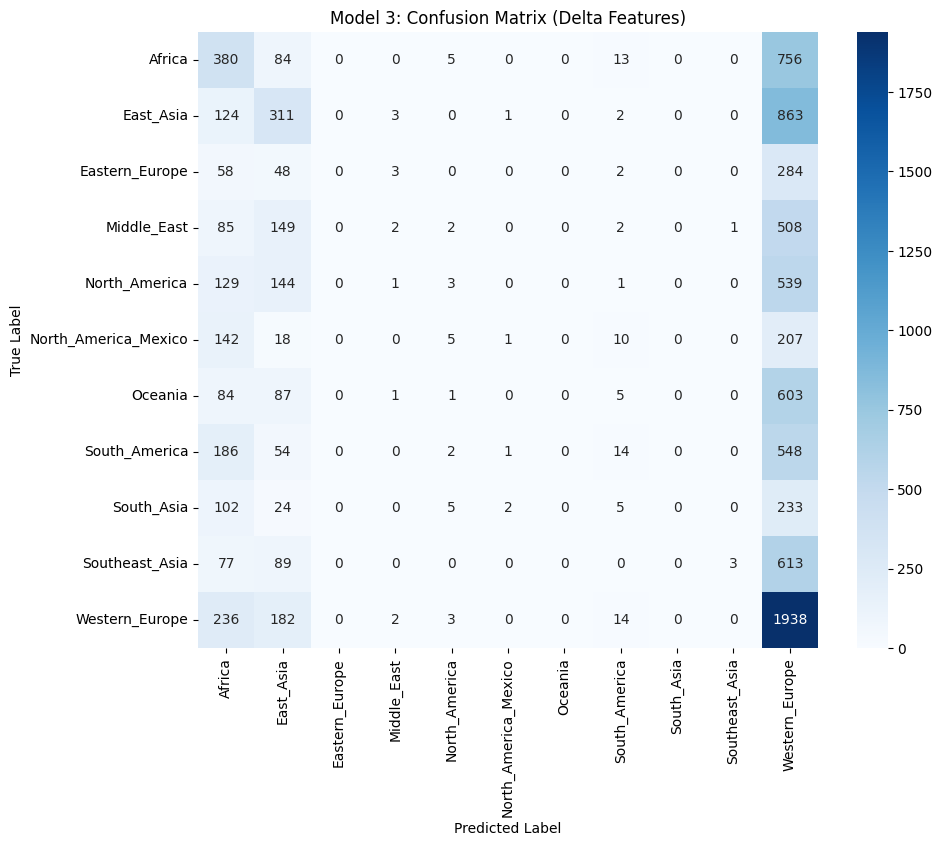

In [114]:
# Create The New Delta Features 
df['cleanliness_delta'] = df['score_cleanliness'] - df['cleanliness_base']
df['comfort_delta'] = df['score_comfort'] - df['comfort_base']
df['facilities_delta'] = df['score_facilities'] - df['facilities_base']
df['location_delta'] = df['score_location'] - df['location_base']
df['staff_delta'] = df['score_staff'] - df['staff_base']
df['value_for_money_delta'] = df['score_value_for_money'] - df['value_for_money_base']

print("New 'delta' features created successfully.")

# Define Feature List for Model 3
# Use only the new delta features and user demographics
feature_list_3 = [
    'cleanliness_delta', 'comfort_delta', 'facilities_delta',
    'location_delta', 'staff_delta', 'value_for_money_delta',
    'user_gender','user_country', 'traveller_type', 'age_group_encoded', 
]

X_model_3 = df[feature_list_3].copy()


X_model_3_encoded = pd.get_dummies(X_model_3, columns=['user_gender', 'traveller_type','user_country'], drop_first=True)
print("Feature set for Model 3 created successfully.")

y = df['country_group'] 


X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_model_3_encoded, y, test_size=0.2, random_state=42)


scaler_3 = StandardScaler()
X_train_scaled_3 = scaler_3.fit_transform(X_train_3)
X_test_scaled_3 = scaler_3.transform(X_test_3)
print("Data for Model 3 scaled successfully.")


model_3 = LogisticRegression(max_iter=1000, random_state=42 )
model_3.fit(X_train_scaled_3, y_train_3)
print("Model 3 (Delta Features) training complete!")

y_pred_test_3 = model_3.predict(X_test_scaled_3)
test_accuracy_3 = accuracy_score(y_test_3, y_pred_test_3)

y_pred_train_3 = model_3.predict(X_train_scaled_3)
train_accuracy_3 = accuracy_score(y_train_3, y_pred_train_3)

print("\n--- Model 3: Overfitting Check (Delta Features) ---")
print(f"   Training Accuracy: {train_accuracy_3:.4f}")
print(f"   Testing Accuracy:  {test_accuracy_3:.4f}")
print("-------------------------------------------------")

print("\n--- Model 3: Full Test Set Report (Delta Features) ---")
print(classification_report(y_test_3, y_pred_test_3, zero_division=0))


cm_3 = confusion_matrix(y_test_3, y_pred_test_3)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_3, annot=True, fmt="d", cmap='Blues', 
            xticklabels=model_3.classes_, yticklabels=model_3.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Model 3: Confusion Matrix (Delta Features)')
plt.show()

so from the results above , we can see that the idea about the new delta feature that embeds the info of the base values and the scores of the users failed as the f1 score became really worse than any try before 

# SHALLOW FFNN
* The process of implementing a FFNN Model is very similar in its initial steps to the ML Model
* We will also carry multiple testing to determine the needed amount of neurons within the hidden layers.
* We start my passing the features needed - once using the initial feature list to again address the fact that the "feature_list" features actually cause a data leakage, and once using the modified feature list and identifying its accuracy and validations.
* After passing the features, we encode and scale, then split the data at hand, then start the process of trying different ffnn architecture

In [115]:
# # Select initial features
# X_f1_ffnn = df[feature_list].copy()

# # Apply One-Hot Encoding to ALL categorical features in X_f1_ffnn except age_group as it is already label encoded
# categorical_cols_to_encode = X_f1_ffnn.select_dtypes(include=['object', 'category']).columns.tolist()

# if 'age_group_encoded' in categorical_cols_to_encode:
#     # age_group_encoded is numerical, so remove it if incorrectly detected as object
#     categorical_cols_to_encode.remove('age_group_encoded')

# X_f1_ffnn_encoded = pd.get_dummies(
#     X_f1_ffnn,
#     columns=categorical_cols_to_encode, 
#     drop_first=True
# )

# # CONVERT TO NUMPY ARRAY AND SPLIT
# y_f1_ffnn = df['country_group']
# y_f1_encoded = label_encoder.fit_transform(y_f1_ffnn)

# X_f1_train, X_f1_test, y_f1_train, y_f1_test = train_test_split(
#     X_f1_ffnn_encoded.values,  # values converts the entire DataFrame to a numerical NumPy array
#     y_f1_encoded,
#     test_size=0.2,
#     random_state=42
# )

# # Initialize and apply scaler
# scaler_ffnn = StandardScaler()
# # These lines will now run without error as X_f1_train is a pure NumPy array of numbers
# X_f1_train_scaled = scaler_ffnn.fit_transform(X_f1_train)
# X_f1_test_scaled = scaler_ffnn.transform(X_f1_test)

# # Final formatting for TensorFlow
# X_f1_train_scaled = np.asarray(X_f1_train_scaled).astype('float32')
# X_f1_test_scaled = np.asarray(X_f1_test_scaled).astype('float32')

# y_f1_train_cat = to_categorical(y_f1_train)
# y_f1_test_cat = to_categorical(y_f1_test)

# num_classes = y_f1_train_cat.shape[1]

# print("Data preprocessing complete. X_f1_train_scaled is ready for the FFNN.")
# print(f"Final feature count: {X_f1_train_scaled.shape[1]}")

In [116]:
# Select initial features
X_f1_ffnn = df[feature_list].copy()

# Apply One-Hot Encoding to categorical features in X
categorical_cols_to_encode = X_f1_ffnn.select_dtypes(include=['object', 'category']).columns.tolist()
if 'age_group_encoded' in categorical_cols_to_encode:
    categorical_cols_to_encode.remove('age_group_encoded')

X_f1_ffnn_encoded = pd.get_dummies(
    X_f1_ffnn,
    columns=categorical_cols_to_encode,
    drop_first=True
)

# Prepare Target (y) using pd.get_dummies
y_f1_ffnn = df['country_group']
y_f1_ohe = pd.get_dummies(y_f1_ffnn) # One-hot encode y directly

# Get class names for later
class_names = y_f1_ohe.columns.tolist()
num_classes = len(class_names)

# Split using the one-hot encoded y DataFrame
X_f1_train, X_f1_test, y_f1_train_ohe, y_f1_test_ohe = train_test_split(
    X_f1_ffnn_encoded, # Split the DataFrame
    y_f1_ohe,          # Split the OHE DataFrame
    test_size=0.2,
    random_state=42
)

# Initialize and apply scaler
scaler_ffnn = StandardScaler()
# Scale the DataFrames
X_f1_train_scaled = scaler_ffnn.fit_transform(X_f1_train)
X_f1_test_scaled = scaler_ffnn.transform(X_f1_test)

# Final formatting for TensorFlow (convert scaled X and OHE y to NumPy)
X_f1_train_scaled = np.asarray(X_f1_train_scaled).astype('float32')
X_f1_test_scaled = np.asarray(X_f1_test_scaled).astype('float32')
y_f1_train_cat = np.asarray(y_f1_train_ohe).astype('float32') # Use the split OHE y
y_f1_test_cat = np.asarray(y_f1_test_ohe).astype('float32')   # Use the split OHE y
# --- MODIFICATION END ---


print("Data preprocessing complete. Scaled data is ready for the FFNN.")
print(f"Final feature count: {X_f1_train_scaled.shape[1]}")
print(f"Shape of one-hot encoded y_train: {y_f1_train_cat.shape}")

Data preprocessing complete. Scaled data is ready for the FFNN.
Final feature count: 43
Shape of one-hot encoded y_train: (40000, 11)


After we've specified our initial features and target, we encoded and split our data, then we scaled.

**Now, it's time to prove the data leakage**

In [117]:
# I will attempt two testing architecutres to prove that there is a data leakage - one having a single 16 neuron hidden layer
#and another containing two 16 neuron hidden layers

model_leak_1 = Sequential([
    Input(shape=(X_f1_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # As our output is multi-class
])

model_leak_1.summary()

model_leak_2 = Sequential([
    Input(shape=(X_f1_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # As our output is multi-class
])

model_leak_2.summary()

model_leak_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)
model_leak_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 16)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 11)             │           187 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 891 (3.48 KB)

 Trainable params: 891 (3.48 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 16)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 11)             │           187 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,163 (4.54 KB)

 Trainable params: 1,163 (4.54 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
early_stop = EarlyStopping (
    monitor = 'val_accuracy',
    patience=3,
    restore_best_weights=True
)

In [119]:
print("Leakage Proof 1: ")
history_leak1 = model_leak_1.fit(X_f1_train_scaled, y_f1_train_cat, validation_split=0.2, epochs=20, batch_size=32, verbose=1, callbacks=[early_stop])

print('========================')
print("Leakage Proof 2: ")
history_leak2 = model_leak_2.fit(X_f1_train_scaled, y_f1_train_cat, validation_split=0.2, epochs=20, batch_size=32, verbose=1, callbacks=[early_stop])

Leakage Proof 1: 
Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3311 - loss: 1.9644 - precision: 0.6746 - recall: 0.0855 - val_accuracy: 0.7001 - val_loss: 0.9591 - val_precision: 0.8905 - val_recall: 0.4664
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7677 - loss: 0.7699 - precision: 0.8996 - recall: 0.5882 - val_accuracy: 0.9075 - val_loss: 0.3804 - val_precision: 0.9626 - val_recall: 0.8164
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9406 - loss: 0.3004 - precision: 0.9705 - recall: 0.8756 - val_accuracy: 0.9951 - val_loss: 0.1440 - val_precision: 0.9976 - val_recall: 0.9861
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9951 - loss: 0.1168 - precision: 0.9973 - recall: 0.9893 - val_accuracy: 0.9990 - val_loss: 0.0616 - val_precision: 0.9994 - val_recall: 0.9974
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9993 - loss: 0.0512 - precision: 0.9994 - recall: 0.9981 - val_acc

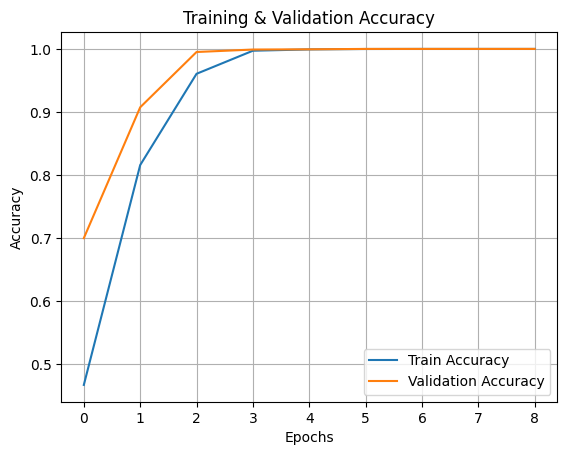

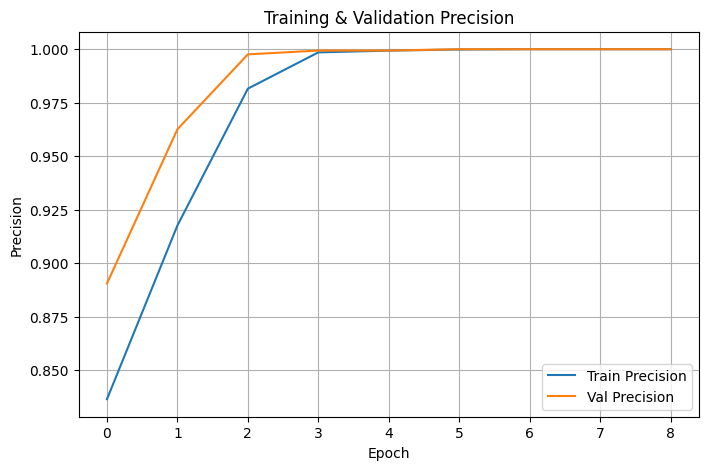

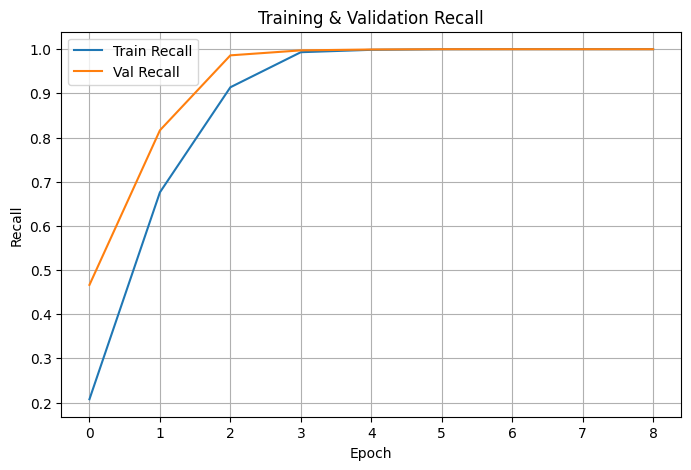

In [120]:
plt.plot(history_leak1.history['accuracy'], label='Train Accuracy')
plt.plot(history_leak1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_leak1.history['precision'], label='Train Precision')
plt.plot(history_leak1.history['val_precision'], label='Val Precision')
plt.title('Training & Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_leak1.history['recall'], label='Train Recall')
plt.plot(history_leak1.history['val_recall'], label='Val Recall')
plt.title('Training & Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

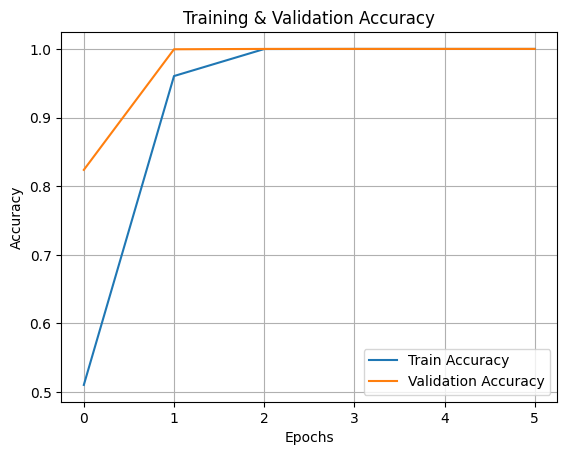

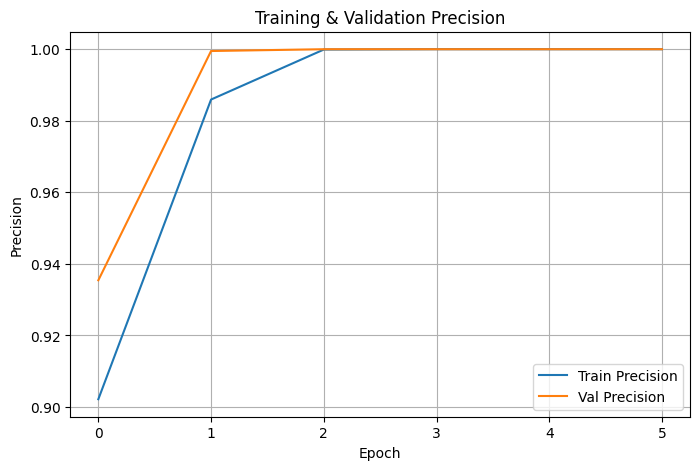

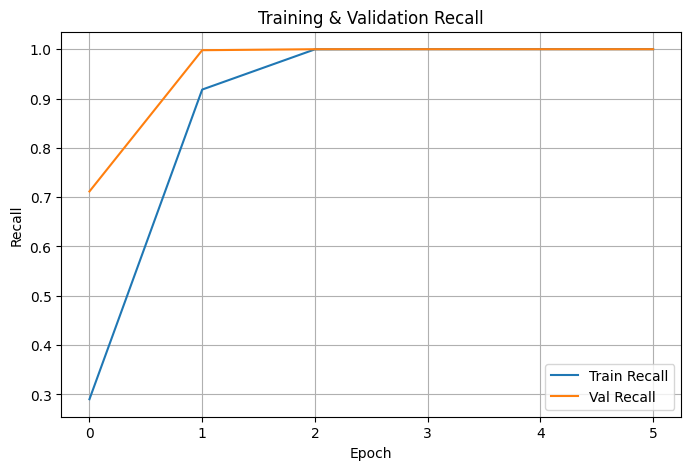

In [121]:
plt.plot(history_leak2.history['accuracy'], label='Train Accuracy')
plt.plot(history_leak2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_leak2.history['precision'], label='Train Precision')
plt.plot(history_leak2.history['val_precision'], label='Val Precision')
plt.title('Training & Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_leak2.history['recall'], label='Train Recall')
plt.plot(history_leak2.history['val_recall'], label='Val Recall')
plt.title('Training & Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
test_loss, test_acc, test_prec, test_rec = model_leak_1.evaluate(X_f1_test_scaled, y_f1_test_cat, verbose=0)

print(f"Test Loss:      {test_loss:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall:    {test_rec:.4f}")


# Generate predictions
y_pred_prob = model_leak_1.predict(X_f1_test_scaled)
y_pred_leak_1 = np.argmax(y_pred_prob, axis=1)

# Convert the one-hot encoded TRUE labels back to integer labels for the report
y_test_integer_labels = np.argmax(y_f1_test_cat, axis=1)


# Classification report
print("\nClassification Report:")
print(classification_report(y_test_integer_labels , y_pred_leak_1, target_names=class_names))


Test Loss:      0.0127
Test Accuracy:  1.0000
Test Precision: 1.0000
Test Recall:    1.0000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
                      precision    recall  f1-score   support

              Africa       1.00      1.00      1.00      1238
           East_Asia       1.00      1.00      1.00      1304
      Eastern_Europe       1.00      1.00      1.00       395
         Middle_East       1.00      1.00      1.00       749
       North_America       1.00      1.00      1.00       817
North_America_Mexico       1.00      1.00      1.00       383
             Oceania       1.00      1.00      1.00       781
       South_America       1.00      1.00      1.00       805
          South_Asia       1.00      1.00      1.00       371
      Southeast_Asia       1.00      1.00      1.00       782
      Western_Europe       1.00      1.00      1.00      2375

            accuracy                           1.00     10000
           macro avg       1.00    

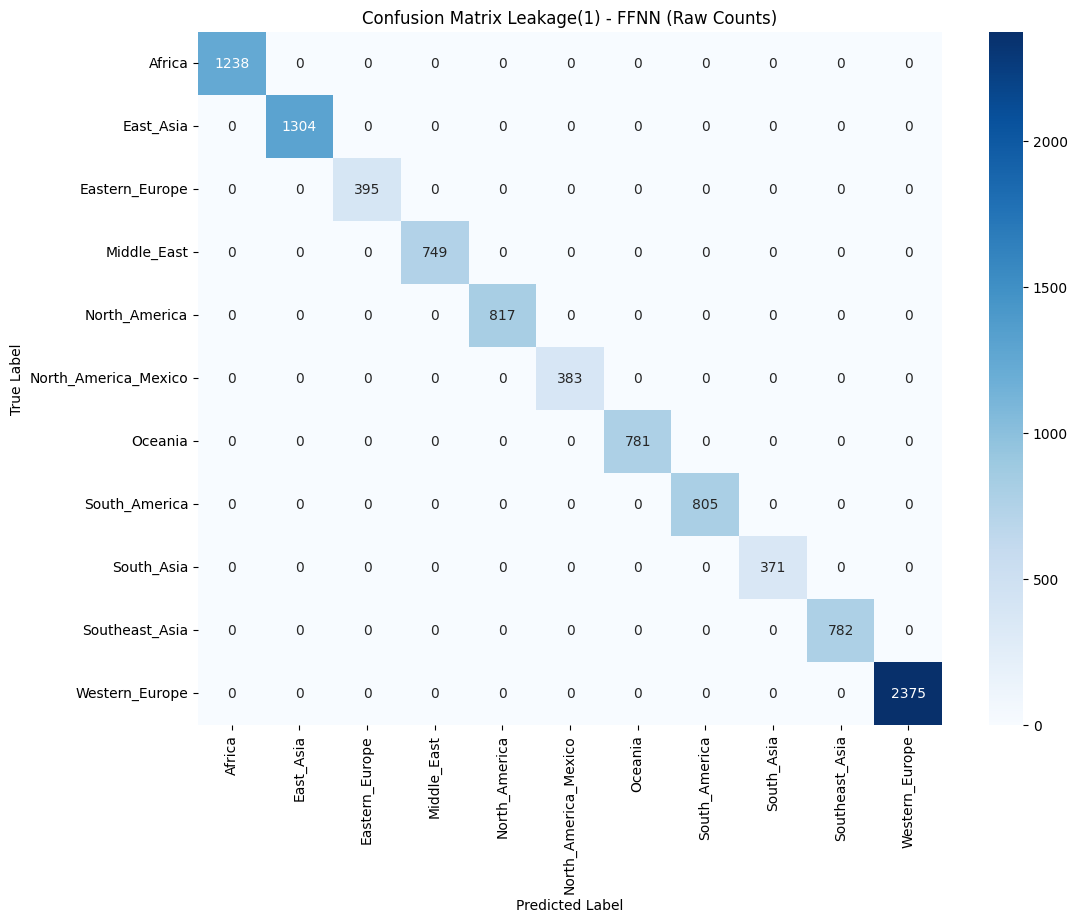

In [123]:
cm = confusion_matrix(y_test_integer_labels, y_pred_leak_1)

# Plot with annotations
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix Leakage(1) - FFNN (Raw Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [124]:
test_loss, test_acc, test_prec, test_rec = model_leak_2.evaluate(X_f1_test_scaled, y_f1_test_cat, verbose=0)

print(f"Test Loss:      {test_loss:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall:    {test_rec:.4f}")


# Generate predictions
y_pred_prob = model_leak_2.predict(X_f1_test_scaled)
y_pred_leak_2 = np.argmax(y_pred_prob, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_integer_labels, y_pred_leak_2, target_names=class_names))

Test Loss:      0.0118
Test Accuracy:  1.0000
Test Precision: 1.0000
Test Recall:    1.0000
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
                      precision    recall  f1-score   support

              Africa       1.00      1.00      1.00      1238
           East_Asia       1.00      1.00      1.00      1304
      Eastern_Europe       1.00      1.00      1.00       395
         Middle_East       1.00      1.00      1.00       749
       North_America       1.00      1.00      1.00       817
North_America_Mexico       1.00      1.00      1.00       383
             Oceania       1.00      1.00      1.00       781
       South_America       1.00      1.00      1.00       805
          South_Asia       1.00      1.00      1.00       371
      Southeast_Asia       1.00      1.00      1.00       782
      Western_Europe       1.00      1.00      1.00      2375

            accuracy                           1.00     10000
           macro avg       1.00    

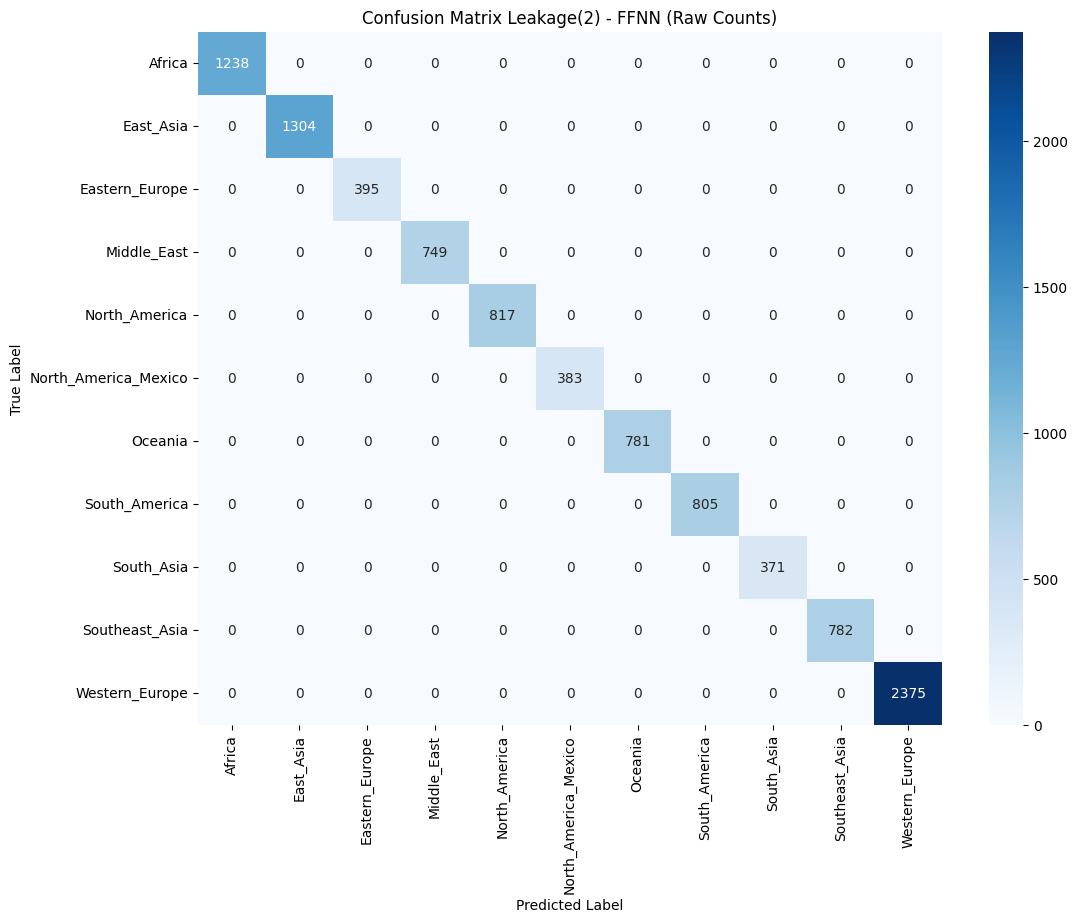

In [125]:
cm = confusion_matrix(y_test_integer_labels, y_pred_leak_2)

# Plot with annotations
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix Leakage(2) - FFNN (Raw Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

what we can see from teh previous results that there is a data leakage becuase we proved before with the logistic regression model but now even the FFNN scores a 100% in every metric and teh confusion matrix shows a perfect diagonal which means the FFNN has not made a single mistake which means overfitting 

# Leakage proved for FFNN
now that we proved that the model actually memorised data, we move towards building a better model .
we will start by testing a base model we chose with 16 newrons and 1 layer with feature_list_2 that doesn't include the features taht cause the leakage .
we will test this list once while it is imbalanced and once with random undersampling done to it and once with random oversampling done to it to find the best approach

In [126]:
# # Select initial features 
# X_f2_ffnn = df[feature_list_2].copy()

# # Identify all categorical columns in the selected feature set
# categorical_cols_to_encode = X_f2_ffnn.select_dtypes(include=['object', 'category']).columns.tolist()

# # Apply One-Hot Encoding to all identified categorical features
# X_f2_ffnn_encoded = pd.get_dummies(
#     X_f2_ffnn,
#     columns=categorical_cols_to_encode, 
#     drop_first=True
# )

# # added this for inference function usage 
# X_encoded_columns_for_ffnn_inference = X_f2_ffnn_encoded.columns.tolist()

# # Prepare Target (y)
# y_f2_ffnn = df['country_group']

# y_f2_encoded = label_encoder.fit_transform(y_f2_ffnn)

# # Split and Convert to Numerical Array
# # .values converts the entire numerical DataFrame (X_f2_ffnn_encoded) to a NumPy array of floats
# X_f2_train, X_f2_test, y_f2_train, y_f2_test = train_test_split(
#     X_f2_ffnn_encoded.values,
#     y_f2_encoded,
#     test_size=0.2,
#     random_state=42
# )

# scaler_ffnn = StandardScaler()
# X_f2_train_scaled = scaler_ffnn.fit_transform(X_f2_train)
# X_f2_test_scaled = scaler_ffnn.transform(X_f2_test)

# # Final Formatting for TensorFlow
# X_f2_train_scaled = np.asarray(X_f2_train_scaled).astype('float32')
# X_f2_test_scaled = np.asarray(X_f2_test_scaled).astype('float32')
# y_f2_train_cat = to_categorical(y_f2_train)
# y_f2_test_cat = to_categorical(y_f2_test)

# num_classes = y_f2_train_cat.shape[1]

# column_names = X_f2_ffnn_encoded.columns.tolist()

# print(f"The {len(column_names)} features are:")
# print(column_names)

# print("Shape of scaled training data:", X_f2_train_scaled.shape)
# print("Shape of scaled testing data:", X_f2_test_scaled.shape)

# print("Data preprocessing for feature_list_2 (No Sampling) complete. Scaled data is ready.")

In [127]:
# Select initial features
X_f2_ffnn = df[feature_list_2].copy()

# Identify all categorical columns in the selected feature set
categorical_cols_to_encode = X_f2_ffnn.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply One-Hot Encoding to all identified categorical features in X
X_f2_ffnn_encoded = pd.get_dummies(
    X_f2_ffnn,
    columns=categorical_cols_to_encode, 
    drop_first=True
)

# Added this for inference function usage 
X_encoded_columns_for_ffnn_inference = X_f2_ffnn_encoded.columns.tolist()

# --- Prepare Target (y) using One-Hot Encoding ---
y_f2_ffnn = df['country_group']
# Use pd.get_dummies directly for y and use the requested variable name
y_f2_ohe = pd.get_dummies(y_f2_ffnn) # <-- RENAMED VARIABLE
# Get class names for potential use later
class_names = y_f2_ohe.columns.tolist() # <-- Use new variable name
num_classes = len(class_names) # Get number of classes

print("Target (y) prepared using One-Hot Encoding.")

# --- Split Data ---
# Split the DataFrames first, using your naming convention
X_f2_train_df, X_f2_test_df, y_f2_train_df, y_f2_test_df = train_test_split(
    X_f2_ffnn_encoded, # Use the DataFrame with features
    y_f2_ohe,          # Use the One-Hot Encoded target DataFrame
    test_size=0.2,
    random_state=42
)

# --- Scale Features ---
scaler_ffnn = StandardScaler()
# Fit on the training DataFrame, transform both train and test DataFrames
X_f2_train_scaled = scaler_ffnn.fit_transform(X_f2_train_df)
X_f2_test_scaled = scaler_ffnn.transform(X_f2_test_df)

# --- Final Formatting for TensorFlow ---
# Convert scaled X and OHE y splits to NumPy float32 arrays
X_f2_train_scaled = np.asarray(X_f2_train_scaled).astype('float32')
X_f2_test_scaled = np.asarray(X_f2_test_scaled).astype('float32')
y_f2_train_cat = np.asarray(y_f2_train_df).astype('float32') # Use your y naming
y_f2_test_cat = np.asarray(y_f2_test_df).astype('float32')   # Use your y naming

# --- Verification ---
# Get column names (remains the same)
column_names = X_f2_ffnn_encoded.columns.tolist()

print(f"\nThe {len(column_names)} features are:")
print(column_names)

print("\nShape of scaled training data (X_f2_train_scaled):", X_f2_train_scaled.shape)
print("Shape of scaled testing data (X_f2_test_scaled):", X_f2_test_scaled.shape)
print("Shape of OHE training target (y_f2_train_cat):", y_f2_train_cat.shape)
print("Shape of OHE testing target (y_f2_test_cat):", y_f2_test_cat.shape)
print(f"Number of classes: {num_classes}")
print("\nData preprocessing complete. Scaled NumPy arrays are ready for the FFNN.")

Target (y) prepared using One-Hot Encoding.

The 37 features are:
['score_overall', 'score_cleanliness', 'score_comfort', 'score_facilities', 'score_location', 'score_staff', 'score_value_for_money', 'age_group_encoded', 'user_country_Australia', 'user_country_Brazil', 'user_country_Canada', 'user_country_China', 'user_country_Egypt', 'user_country_France', 'user_country_Germany', 'user_country_India', 'user_country_Italy', 'user_country_Japan', 'user_country_Mexico', 'user_country_Netherlands', 'user_country_New Zealand', 'user_country_Nigeria', 'user_country_Russia', 'user_country_Singapore', 'user_country_South Africa', 'user_country_South Korea', 'user_country_Spain', 'user_country_Thailand', 'user_country_Turkey', 'user_country_United Arab Emirates', 'user_country_United Kingdom', 'user_country_United States', 'user_gender_Male', 'user_gender_Other', 'traveller_type_Couple', 'traveller_type_Family', 'traveller_type_Solo']

Shape of scaled training data (X_f2_train_scaled): (40000,

In [128]:
model_f2 = Sequential([
    Input(shape=(X_f2_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # As our output is multi-class
])

model_f2.summary()

model_f2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

history_f2 = model_f2.fit(X_f2_train_scaled, y_f2_train_cat, validation_split=0.2, epochs=30, batch_size=32, verbose=1, callbacks=[early_stop])

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 16)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 11)             │           187 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795 (3.11 KB)

 Trainable params: 795 (3.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2092 - loss: 2.3451 - precision: 0.4004 - recall: 0.0067 - val_accuracy: 0.3176 - val_loss: 2.0203 - val_precision: 0.6000 - val_recall: 0.0345
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3180 - loss: 1.9990 - precision: 0.6138 - recall: 0.0428 - val_accuracy: 0.3329 - val_loss: 1.9498 - val_precision: 0.5955 - val_recall: 0.0534
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3316 - loss: 1.9317 - precision: 0.6267 - recall: 0.0616 - val_accuracy: 0.3422 - val_loss: 1.9166 - val_precision: 0.6112 - val_recall: 0.0749
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3416 - loss: 1.8991 - precision: 0.6235 - recall: 0.0743 - val_accuracy: 0.3480 - val_loss: 1.8897 - val_precision: 0.6211 - val_recall: 0.0728
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3516 - loss: 1.8777 - precision: 0.6321 - recall: 0.0788 - val_accuracy: 0.3532 - va

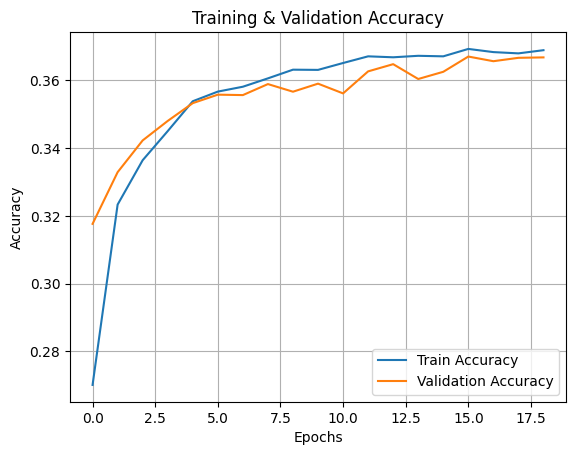

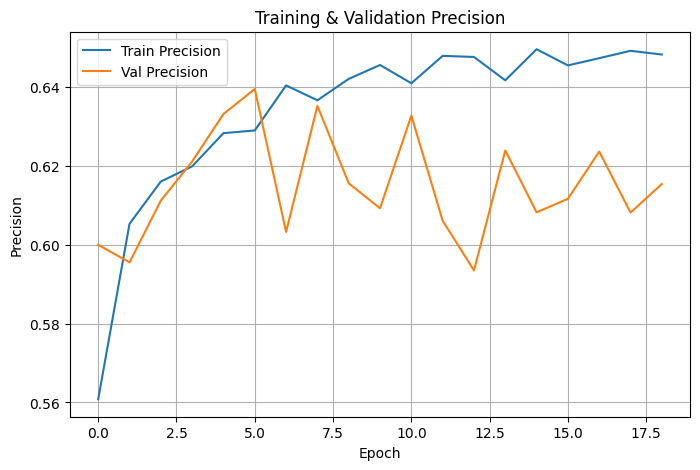

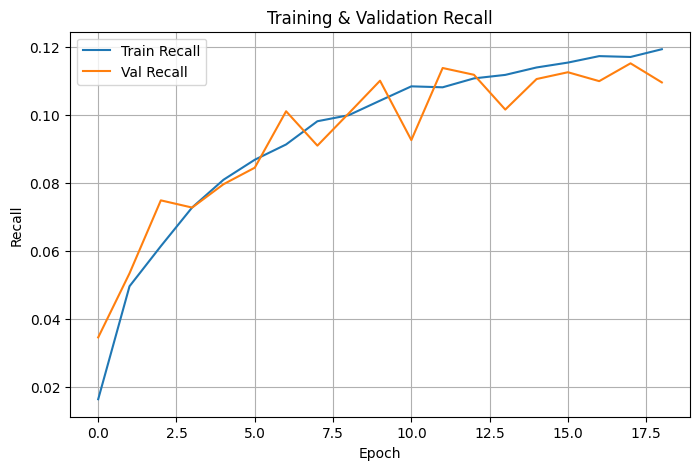

In [129]:
plt.plot(history_f2.history['accuracy'], label='Train Accuracy')
plt.plot(history_f2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_f2.history['precision'], label='Train Precision')
plt.plot(history_f2.history['val_precision'], label='Val Precision')
plt.title('Training & Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_f2.history['recall'], label='Train Recall')
plt.plot(history_f2.history['val_recall'], label='Val Recall')
plt.title('Training & Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

In [130]:
test_loss, test_acc, test_prec, test_rec = model_f2.evaluate(X_f2_test_scaled, y_f2_test_cat, verbose=0)

print(f"Test Loss:      {test_loss:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall:    {test_rec:.4f}")


# Generate predictions
y_pred_prob = model_f2.predict(X_f2_test_scaled)
y_pred_f2 = np.argmax(y_pred_prob, axis=1)
y_f2_test_integer_labels = np.argmax(y_f2_test_cat,axis = 1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_f2_test_integer_labels, y_pred_f2, target_names=class_names,zero_division = 0))

Test Loss:      1.7966
Test Accuracy:  0.3719
Test Precision: 0.6422
Test Recall:    0.1217
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
                      precision    recall  f1-score   support

              Africa       0.36      0.44      0.40      1238
           East_Asia       0.48      0.41      0.44      1304
      Eastern_Europe       0.18      0.02      0.04       395
         Middle_East       0.36      0.21      0.27       749
       North_America       0.37      0.26      0.31       817
North_America_Mexico       0.24      0.11      0.15       383
             Oceania       0.33      0.11      0.16       781
       South_America       0.27      0.19      0.23       805
          South_Asia       0.00      0.00      0.00       371
      Southeast_Asia       0.38      0.23      0.28       782
      Western_Europe       0.37      0.76      0.50      2375

            accuracy                           0.37     10000
           macro avg       0.30    

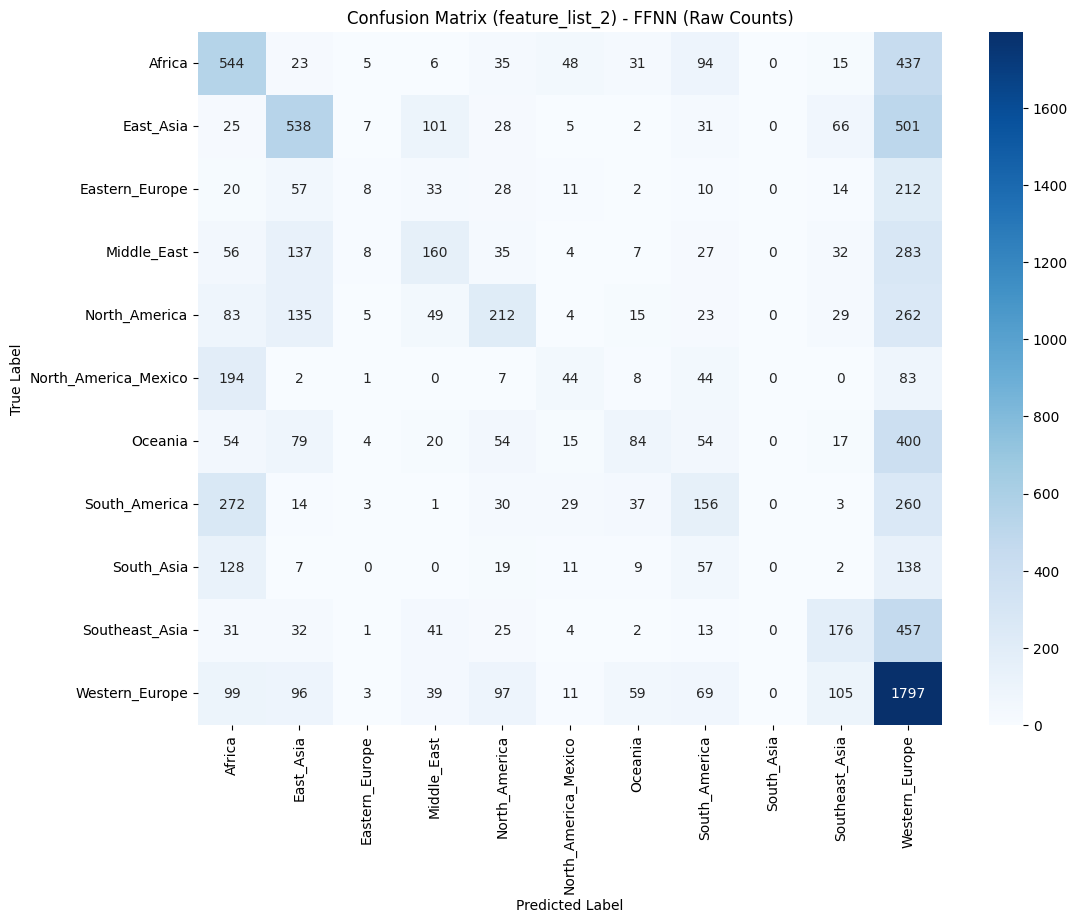

In [131]:
cm = confusion_matrix(y_test_integer_labels, y_pred_f2)

# Plot with annotations
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix (feature_list_2) - FFNN (Raw Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Oversampling and Undersampling

we did label encoding here for for the country_group in the oversampling and the undersampling instead of one hot encoding because the over sampler needs labels to be able to identify the classes where it will either remove rows from or add rows to by duplicating .

In [132]:
# Oversampling

# The initial steps are the same as the "No Sampling" case
# Select initial features
X_f2_ffnn_os = df[feature_list_2].copy()

# Identify and encode all categorical features
categorical_cols_to_encode = X_f2_ffnn_os.select_dtypes(include=['object', 'category']).columns.tolist()
X_f2_ffnn_encoded_os = pd.get_dummies(X_f2_ffnn_os, columns=categorical_cols_to_encode, drop_first=True)

# Prepare Target (y)
y_f2_ffnn_os = df['country_group']
y_f2_encoded_os = label_encoder.fit_transform(y_f2_ffnn_os)

# Split the data into training and testing sets
X_f2_train_os, X_f2_test_os, y_f2_train_os, y_f2_test_os = train_test_split(
    X_f2_ffnn_encoded_os.values,
    y_f2_encoded_os,
    test_size=0.2,
    random_state=42
)

# Scale the Training Data
X_f2_train_scaled_os = scaler_ffnn.fit_transform(X_f2_train_os)

# APPLY OVERSAMPLING to the scaled training data
ros = RandomOverSampler(random_state=42)
X_f2_train_oversampled, y_f2_train_oversampled = ros.fit_resample(X_f2_train_scaled_os, y_f2_train_os)

#Scale the Test Data (using the scaler fitted on the original training data)
X_f2_test_scaled = scaler_ffnn.transform(X_f2_test_os)

# Final Formatting for TensorFlow
X_f2_train_scaled_os = np.asarray(X_f2_train_oversampled).astype('float32')
X_f2_test_scaled_os = np.asarray(X_f2_test_scaled).astype('float32')
y_f2_train_cat_os = to_categorical(y_f2_train_oversampled)
y_f2_test_cat_os = to_categorical(y_f2_test_os) # Test target remains the same

num_classes = y_f2_train_cat_os.shape[1]

print("Data preprocessing for feature_list_2 (Oversampling) complete.")
print(f"Original training shape: {X_f2_train_scaled.shape}")
print(f"Oversampled training shape: {X_f2_train_scaled_os.shape}")

Data preprocessing for feature_list_2 (Oversampling) complete.
Original training shape: (40000, 37)
Oversampled training shape: (104511, 37)


In [133]:
model_f2_os = Sequential([
    Input(shape=(X_f2_train_scaled_os.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # As our output is multi-class
])

model_f2_os.summary()

model_f2_os.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

history_f2_os = model_f2_os.fit(X_f2_train_scaled_os, y_f2_train_cat_os, validation_split=0.2, epochs=50, batch_size=32, verbose=1, callbacks=[early_stop])

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 16)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 11)             │           187 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795 (3.11 KB)

 Trainable params: 795 (3.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2613/2613 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1867 - loss: 2.2390 - precision: 0.3556 - recall: 0.0047 - val_accuracy: 0.0029 - val_loss: 3.0927 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
2613/2613 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2875 - loss: 1.9561 - precision: 0.6519 - recall: 0.0308 - val_accuracy: 0.0075 - val_loss: 3.0296 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
2613/2613 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3157 - loss: 1.8839 - precision: 0.6756 - recall: 0.0528 - val_accuracy: 0.0239 - val_loss: 2.9527 - val_precision: 0.0142 - val_recall: 5.2624e-04
Epoch 4/50
2613/2613 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3238 - loss: 1.8605 - precision: 0.6863 - recall: 0.0641 - val_accuracy: 0.0277 - val_loss: 2.9905 - val_precision: 0.0198 - val_recall: 0.0012
Epoch 5/50
2613/2613 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3320 - loss: 1.8394 - precision: 0.6769 - recall: 0.0760 - val_a

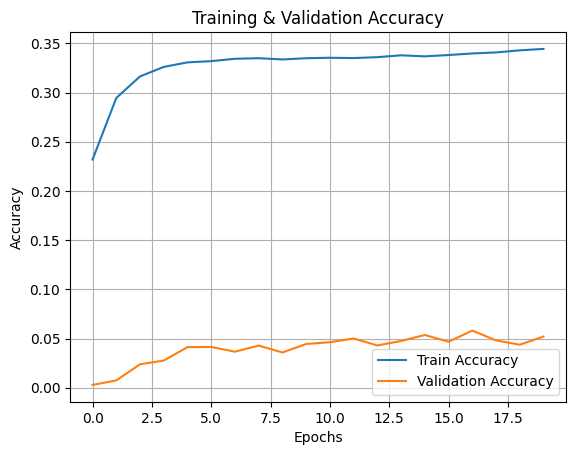

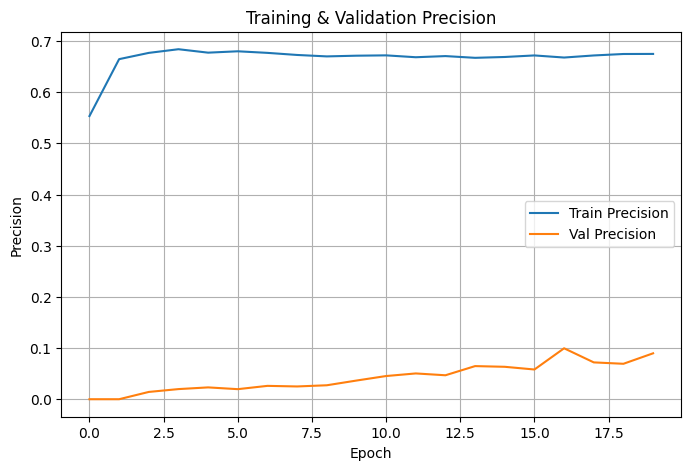

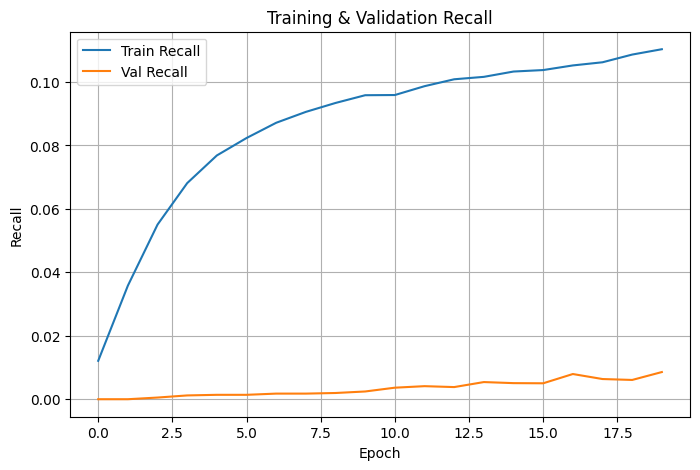

In [134]:
plt.plot(history_f2_os.history['accuracy'], label='Train Accuracy')
plt.plot(history_f2_os.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_f2_os.history['precision'], label='Train Precision')
plt.plot(history_f2_os.history['val_precision'], label='Val Precision')
plt.title('Training & Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_f2_os.history['recall'], label='Train Recall')
plt.plot(history_f2_os.history['val_recall'], label='Val Recall')
plt.title('Training & Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

In [135]:
test_loss, test_acc, test_prec, test_rec = model_f2_os.evaluate(X_f2_test_scaled_os, y_f2_test_cat_os, verbose=0)

print(f"Test Loss:      {test_loss:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall:    {test_rec:.4f}")

# Generate predictions
y_pred_prob_os = model_f2_os.predict(X_f2_test_scaled_os)
y_pred_f2_os = np.argmax(y_pred_prob_os, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_f2_test_os, y_pred_f2_os, zero_division=0))

Test Loss:      1.9203
Test Accuracy:  0.2908
Test Precision: 0.5865
Test Recall:    0.0871
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.24      0.28      1238
           1       0.46      0.36      0.41      1304
           2       0.11      0.42      0.17       395
           3       0.24      0.34      0.28       749
           4       0.27      0.36      0.31       817
           5       0.14      0.57      0.23       383
           6       0.22      0.21      0.22       781
           7       0.49      0.07      0.13       805
           8       0.00      0.00      0.00       371
           9       0.43      0.12      0.19       782
          10       0.49      0.37      0.43      2375

    accuracy                           0.29     10000
   macro avg       0.29      0.28      0.24     10000
weighted avg       0.36      0.29      0.29     10000



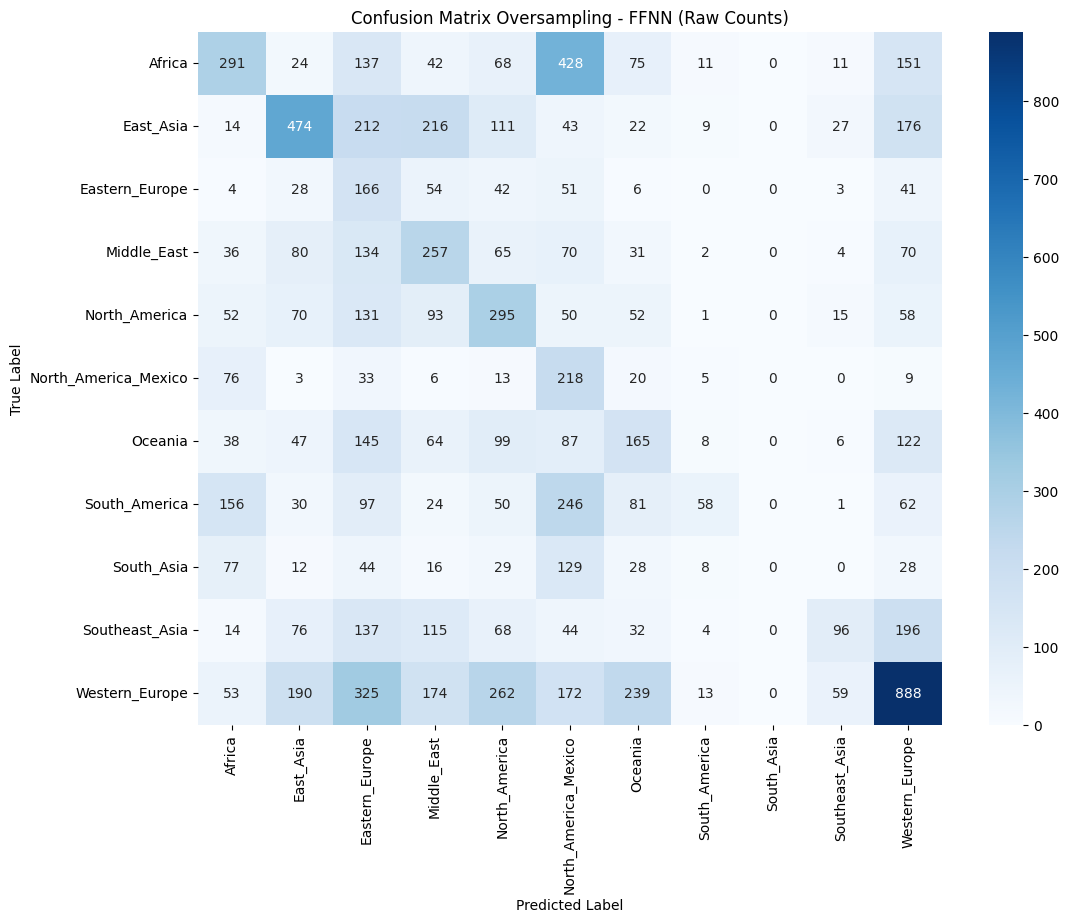

In [136]:
cm = confusion_matrix(y_f2_test_os, y_pred_f2_os)

# Plot with annotations
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

plt.title('Confusion Matrix Oversampling - FFNN (Raw Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [137]:
# Undersampling

# Select initial features
X_f2_ffnn_us = df[feature_list_2].copy()

# Identify and encode all categorical features
categorical_cols_to_encode = X_f2_ffnn_us.select_dtypes(include=['object', 'category']).columns.tolist()
X_f2_ffnn_encoded_us = pd.get_dummies(X_f2_ffnn_us, columns=categorical_cols_to_encode, drop_first=True)

# Prepare Target (y)
y_f2_ffnn_us = df['country_group']
y_f2_encoded_us = label_encoder.fit_transform(y_f2_ffnn_us)

# Split the data into training and testing sets
X_f2_train_us, X_f2_test_us, y_f2_train_us, y_f2_test_us = train_test_split(
    X_f2_ffnn_encoded_us.values,
    y_f2_encoded_us,
    test_size=0.2,
    random_state=42
)

# Scale the Training Data
X_f2_train_scaled_us = scaler_ffnn.fit_transform(X_f2_train_us)

# APPLY UNDERSAMPLING to the scaled training data
rus = RandomUnderSampler(random_state=42)
X_f2_train_undersampled, y_f2_train_undersampled = rus.fit_resample(X_f2_train_scaled_us, y_f2_train_us)

# Final Formatting for TensorFlow
X_f2_train_scaled_us = np.asarray(X_f2_train_undersampled).astype('float32')
X_f2_test_scaled_us = np.asarray(X_f2_test_scaled).astype('float32')
y_f2_train_cat_us = to_categorical(y_f2_train_undersampled)
y_f2_test_cat_us = to_categorical(y_f2_test_us) # Test target remains the same

num_classes = y_f2_train_cat_us.shape[1]

print("Data preprocessing for feature_list_2 (Undersampling) complete.")
print(f"Original training shape: {X_f2_train_scaled.shape}")
print(f"Undersampled training shape: {X_f2_train_scaled_us.shape}")

Data preprocessing for feature_list_2 (Undersampling) complete.
Original training shape: (40000, 37)
Undersampled training shape: (17325, 37)


In [138]:
model_f2_us = Sequential([
    Input(shape=(X_f2_train_scaled_us.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # As our output is multi-class
])

model_f2_us.summary()

model_f2_us.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

history_f2_us = model_f2_us.fit(X_f2_train_scaled_us, y_f2_train_cat_us, validation_split=0.2, epochs=50, batch_size=32, verbose=1, callbacks=[early_stop])

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 16)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 11)             │           187 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795 (3.11 KB)

 Trainable params: 795 (3.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
434/434 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1128 - loss: 2.5325 - precision: 0.1128 - recall: 0.0013 - val_accuracy: 0.0055 - val_loss: 3.8320 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
434/434 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2017 - loss: 2.0693 - precision: 0.6571 - recall: 0.0014 - val_accuracy: 0.0012 - val_loss: 4.8663 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
434/434 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2435 - loss: 1.9570 - precision: 0.5889 - recall: 0.0034 - val_accuracy: 0.0023 - val_loss: 5.5889 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
434/434 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2581 - loss: 1.9155 - precision: 0.5784 - recall: 0.0058 - val_accuracy: 8.6580e-04 - val_loss: 6.1411 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


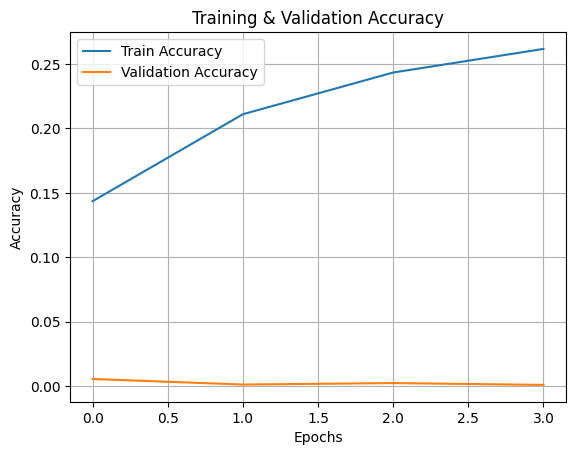

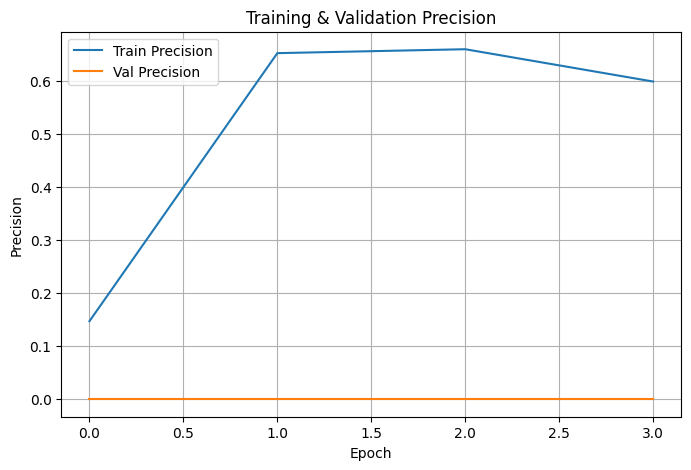

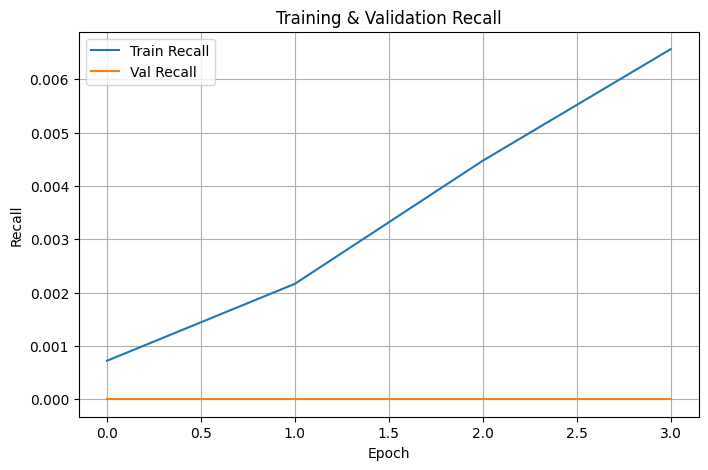

In [139]:
plt.plot(history_f2_us.history['accuracy'], label='Train Accuracy')
plt.plot(history_f2_us.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_f2_us.history['precision'], label='Train Precision')
plt.plot(history_f2_us.history['val_precision'], label='Val Precision')
plt.title('Training & Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_f2_us.history['recall'], label='Train Recall')
plt.plot(history_f2_us.history['val_recall'], label='Val Recall')
plt.title('Training & Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
test_loss, test_acc, test_prec, test_rec = model_f2_us.evaluate(X_f2_test_scaled_us, y_f2_test_cat_us, verbose=0)

print(f"Test Loss:      {test_loss:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall:    {test_rec:.4f}")

# Generate predictions
y_pred_prob_us = model_f2_os.predict(X_f2_test_scaled_us)
y_pred_f2_us = np.argmax(y_pred_prob_us, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_f2_test_us, y_pred_f2_us, zero_division=0))

Test Loss:      2.7673
Test Accuracy:  0.1317
Test Precision: 0.2500
Test Recall:    0.0002
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.24      0.28      1238
           1       0.46      0.36      0.41      1304
           2       0.11      0.42      0.17       395
           3       0.24      0.34      0.28       749
           4       0.27      0.36      0.31       817
           5       0.14      0.57      0.23       383
           6       0.22      0.21      0.22       781
           7       0.49      0.07      0.13       805
           8       0.00      0.00      0.00       371
           9       0.43      0.12      0.19       782
          10       0.49      0.37      0.43      2375

    accuracy                           0.29     10000
   macro avg       0.29      0.28      0.24     10000
weighted avg       0.36      0.29      0.29     10000



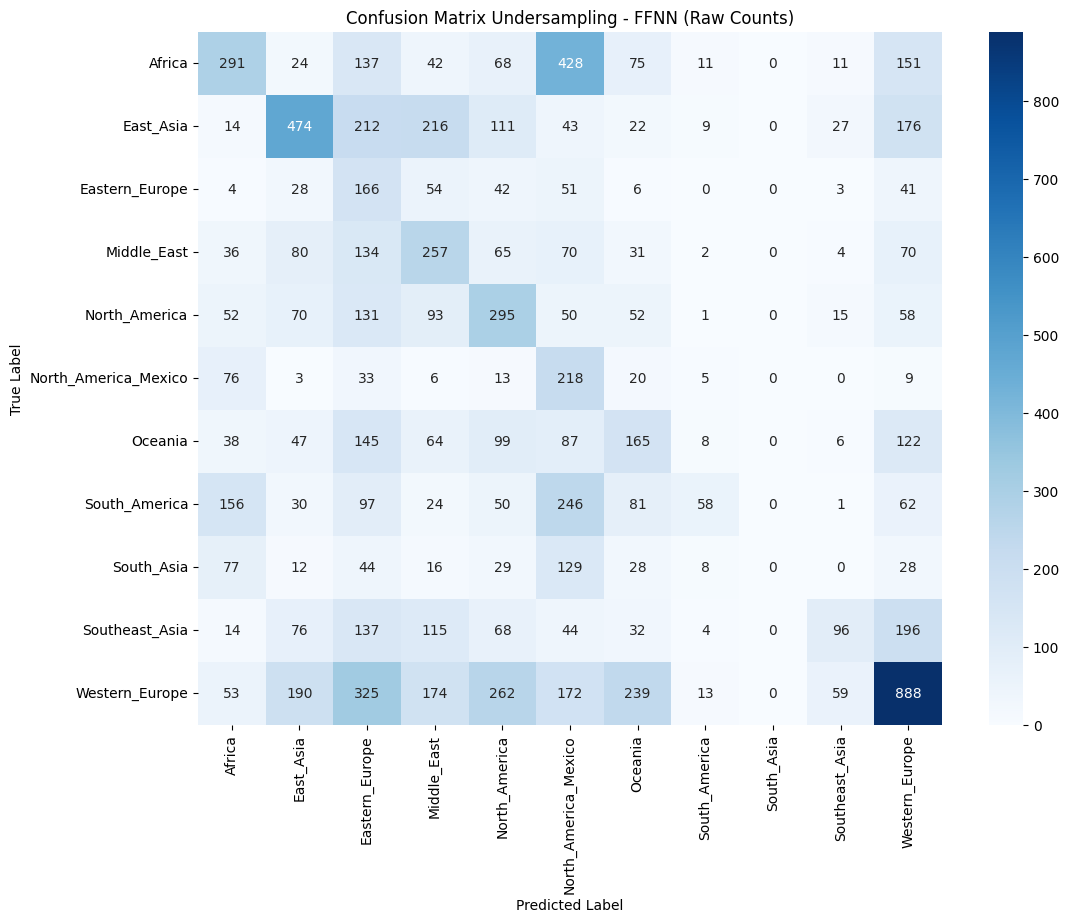

In [141]:
cm = confusion_matrix(y_f2_test_us, y_pred_f2_us)

# Plot with annotations
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

plt.title('Confusion Matrix Undersampling - FFNN (Raw Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature List 3
we will now try the feature list 3 with th engineered delta features to see if the model will perform better or not 

In [142]:
# # Select initial features
# X_f3_ffnn = df[feature_list_3].copy()

# # Identify and encode all categorical features
# categorical_cols_to_encode = X_f3_ffnn.select_dtypes(include=['object', 'category']).columns.tolist()
# X_f3_ffnn_encoded = pd.get_dummies(X_f3_ffnn, columns=categorical_cols_to_encode, drop_first=True)

# # Prepare Target (y)
# y_f3_ffnn = df['country_group']
# y_f3_encoded = label_encoder.fit_transform(y_f3_ffnn)

# # Split the data into training and testing sets
# X_f3_train, X_f3_test, y_f3_train, y_f3_test = train_test_split(
#     X_f3_ffnn_encoded.values,
#     y_f3_encoded,
#     test_size=0.2,
#     random_state=42
# )

# # Scale the Training Data
# X_f3_train_scaled = scaler_ffnn.fit_transform(X_f3_train)

# X_f3_train_scaled = scaler_ffnn.fit_transform(X_f3_train)
# X_f3_test_scaled = scaler_ffnn.transform(X_f3_test)

# # Final Formatting for TensorFlow
# X_f3_train_scaled = np.asarray(X_f3_train_scaled).astype('float32')
# X_f3_test_scaled = np.asarray(X_f3_test_scaled).astype('float32')
# y_f3_train_cat = to_categorical(y_f3_train)
# y_f3_test_cat = to_categorical(y_f3_test)

# num_classes = y_f3_train_cat.shape[1]

# print("Data preprocessing for feature_list_3 complete. Scaled data is ready.")

In [143]:
# --- Prepare Features (X) ---
# Select initial features (Assuming feature_list_3 is defined correctly)
X_f3_ffnn = df[feature_list_3].copy()

# Identify and encode all categorical features in X
categorical_cols_to_encode = X_f3_ffnn.select_dtypes(include=['object', 'category']).columns.tolist()
X_f3_ffnn_encoded = pd.get_dummies(X_f3_ffnn, columns=categorical_cols_to_encode, drop_first=True)

# --- Prepare Target (y) using One-Hot Encoding ---
y_f3_ffnn = df['country_group']
# Use pd.get_dummies directly for y
y_f3_ohe = pd.get_dummies(y_f3_ffnn)
# Get class names and number of classes
class_names = y_f3_ohe.columns.tolist()
num_classes = len(class_names) # Get number of classes

# --- Split the Data (using DataFrames) ---
# Split the DataFrames first
X_f3_train_df, X_f3_test_df, y_f3_train_df, y_f3_test_df = train_test_split(
    X_f3_ffnn_encoded, # Use the feature DataFrame
    y_f3_ohe,          # Use the One-Hot Encoded target DataFrame
    test_size=0.2,
    random_state=42
)

scaler_f3 = StandardScaler()

X_f3_train_scaled = scaler_f3.fit_transform(X_f3_train_df)
X_f3_test_scaled = scaler_f3.transform(X_f3_test_df)

print("Feature data scaled successfully.")

# --- Final Formatting for TensorFlow ---
# Assign scaled X arrays to your final variable names
X_f3_train_scaled = np.asarray(X_f3_train_scaled).astype('float32') # Already NumPy
X_f3_test_scaled = np.asarray(X_f3_test_scaled).astype('float32')     # Use the scaled test data

# Convert the split OHE DataFrames to NumPy arrays with your final variable names
y_f3_train_cat = np.asarray(y_f3_train_df).astype('float32') # Convert split OHE y
y_f3_test_cat = np.asarray(y_f3_test_df).astype('float32')   # Convert split OHE y

# --- Verification ---
print("\nFinal Shapes for TensorFlow:")
print(f"Scaled training shape (X_f3_train_scaled): {X_f3_train_scaled.shape}")
print(f"Scaled testing shape (X_f3_test_scaled): {X_f3_test_scaled.shape}")
print(f"OHE training target shape (y_f3_train_cat): {y_f3_train_cat.shape}")
print(f"OHE testing target shape (y_f3_test_cat): {y_f3_test_cat.shape}")
print(f"Number of classes: {num_classes}")
print("\nData preprocessing for feature_list_3 complete.")

Feature data scaled successfully.

Final Shapes for TensorFlow:
Scaled training shape (X_f3_train_scaled): (40000, 36)
Scaled testing shape (X_f3_test_scaled): (10000, 36)
OHE training target shape (y_f3_train_cat): (40000, 11)
OHE testing target shape (y_f3_test_cat): (10000, 11)
Number of classes: 11

Data preprocessing for feature_list_3 complete.


In [144]:
model_f3 = Sequential([
    Input(shape=(X_f3_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # As our output is multi-class
])

model_f3.summary()

model_f3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

history_f3 = model_f3.fit(X_f3_train_scaled, y_f3_train_cat, validation_split=0.2, epochs=50, batch_size=32, verbose=1, callbacks=[early_stop])

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 16)             │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 11)             │           187 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 779 (3.04 KB)

 Trainable params: 779 (3.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1927 - loss: 2.4258 - precision: 0.2638 - recall: 0.0029 - val_accuracy: 0.2420 - val_loss: 2.2307 - val_precision: 0.6667 - val_recall: 0.0012
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2446 - loss: 2.2210 - precision: 0.3895 - recall: 5.9830e-04 - val_accuracy: 0.2559 - val_loss: 2.1925 - val_precision: 0.6667 - val_recall: 5.0000e-04
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2559 - loss: 2.1802 - precision: 0.4274 - recall: 6.7107e-04 - val_accuracy: 0.2573 - val_loss: 2.1775 - val_precision: 0.6667 - val_recall: 2.5000e-04
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2553 - loss: 2.1725 - precision: 0.3925 - recall: 4.4886e-04 - val_accuracy: 0.2621 - val_loss: 2.1718 - val_precision: 0.5000 - val_recall: 6.2500e-04
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2605 - loss: 2.1665 - precision: 0.5447 - recall: 5.3935e-04

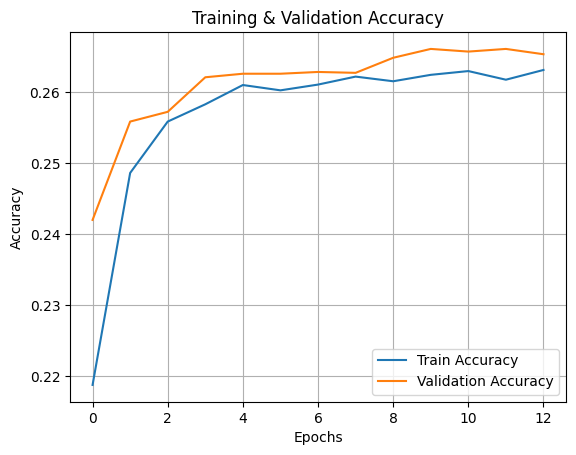

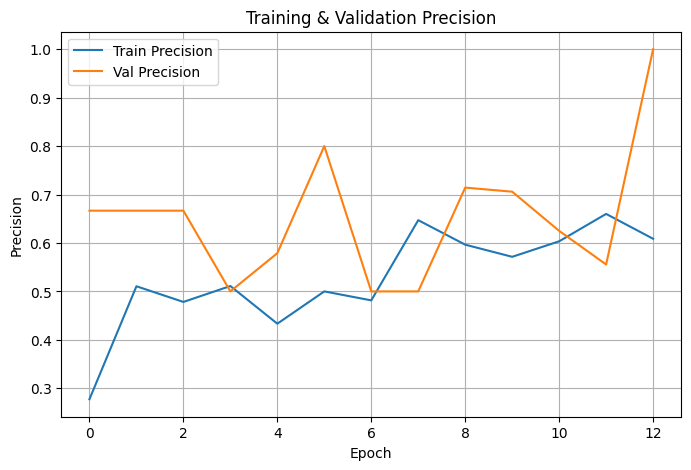

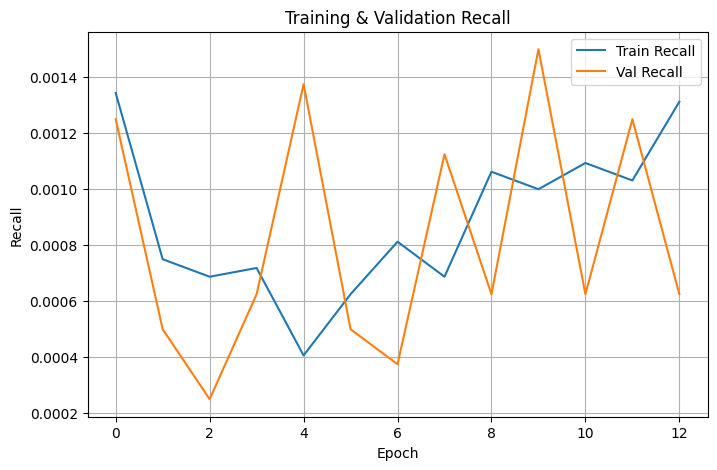

In [145]:
plt.plot(history_f3.history['accuracy'], label='Train Accuracy')
plt.plot(history_f3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_f3.history['precision'], label='Train Precision')
plt.plot(history_f3.history['val_precision'], label='Val Precision')
plt.title('Training & Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_f3.history['recall'], label='Train Recall')
plt.plot(history_f3.history['val_recall'], label='Val Recall')
plt.title('Training & Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

In [146]:
test_loss, test_acc, test_prec, test_rec = model_f3.evaluate(X_f3_test_scaled, y_f3_test_cat, verbose=0)

print(f"Test Loss:      {test_loss:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall:    {test_rec:.4f}")

# Generate predictions
y_pred_prob_f3 = model_f3.predict(X_f3_test_scaled)
y_pred_f3 = np.argmax(y_pred_prob_f3, axis=1)
y_f3_test_integer_labels = np.argmax(y_f3_test_cat, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_f3_test_integer_labels, y_pred_f3, zero_division=0, target_names=class_names))

Test Loss:      2.1675
Test Accuracy:  0.2623
Test Precision: 0.5000
Test Recall:    0.0011
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:
                      precision    recall  f1-score   support

              Africa       0.23      0.28      0.25      1238
           East_Asia       0.27      0.22      0.24      1304
      Eastern_Europe       0.00      0.00      0.00       395
         Middle_East       0.32      0.02      0.03       749
       North_America       0.07      0.00      0.00       817
North_America_Mexico       0.00      0.00      0.00       383
             Oceania       0.00      0.00      0.00       781
       South_America       0.25      0.00      0.00       805
          South_Asia       0.00      0.00      0.00       371
      Southeast_Asia       0.40      0.01      0.01       782
      Western_Europe       0.27      0.83      0.40      2375

            accuracy                           0.26     10000
           macro avg       0.17    

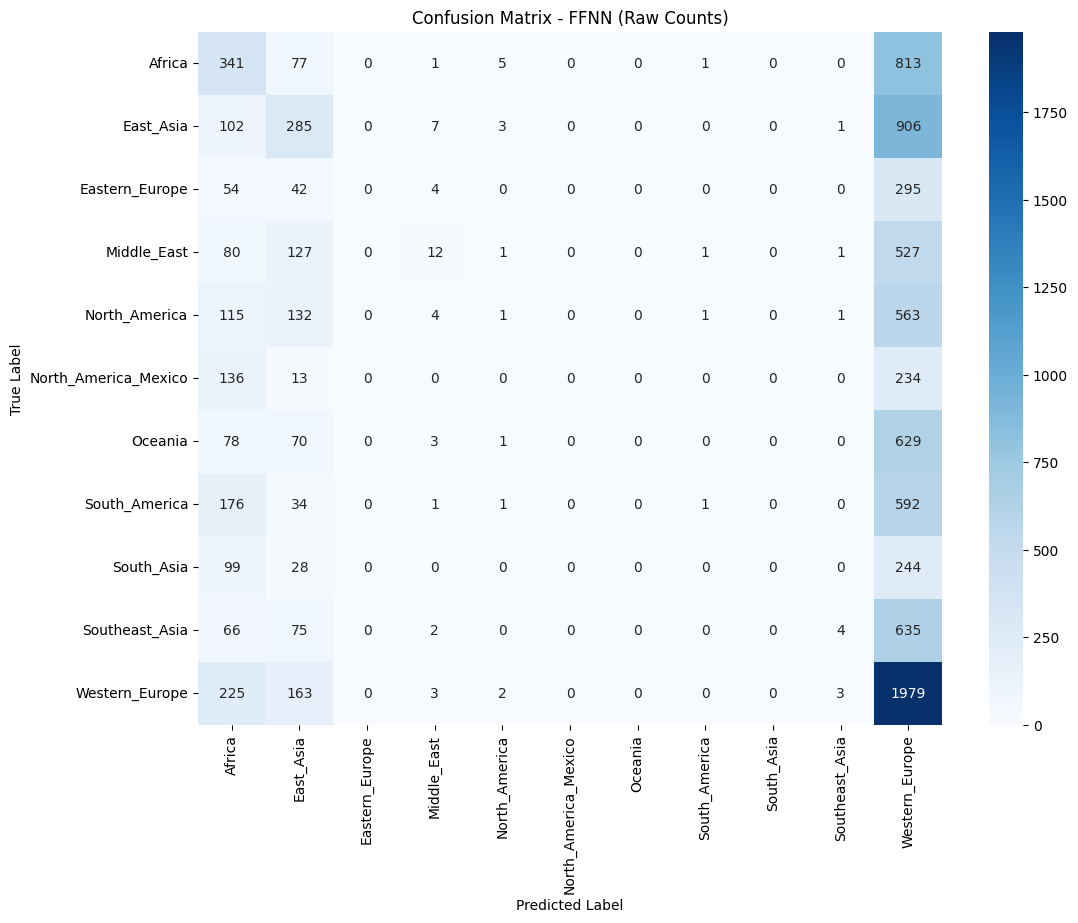

In [147]:
cm = confusion_matrix(y_f3_test_integer_labels, y_pred_f3)

# Plot with annotations
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix - FFNN (Raw Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from all the previous tests , we deduced that the best scenario is to use feature_list_2 and leave it imbalanced 

but we want to try to make the model better so we will test different architectures of FFNNs to see if there will be a differnece 

# Trying to make the model better ( with feature list 2 )

In [148]:
# we will only build the FFNNs as they will run on the same variables
# we will start with a NN with the same number of layers but with more newrons 

model_f2_2nd_test = Sequential([
    Input(shape=(X_f2_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # As our output is multi-class
])

model_f2_2nd_test.summary()

model_f2_2nd_test.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

history_f2_2nd_test = model_f2_2nd_test.fit(X_f2_train_scaled, y_f2_train_cat, validation_split=0.2, epochs=50, batch_size=32, verbose=1, callbacks=[early_stop])

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 32)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,579 (6.17 KB)

 Trainable params: 1,579 (6.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2337 - loss: 2.2624 - precision: 0.3995 - recall: 0.0135 - val_accuracy: 0.3184 - val_loss: 1.9836 - val_precision: 0.5970 - val_recall: 0.0404
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3293 - loss: 1.9553 - precision: 0.5918 - recall: 0.0498 - val_accuracy: 0.3359 - val_loss: 1.9272 - val_precision: 0.5966 - val_recall: 0.0575
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3400 - loss: 1.9100 - precision: 0.6167 - recall: 0.0652 - val_accuracy: 0.3433 - val_loss: 1.8963 - val_precision: 0.5975 - val_recall: 0.0763
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3475 - loss: 1.8829 - precision: 0.6064 - recall: 0.0746 - val_accuracy: 0.3519 - val_loss: 1.8735 - val_precision: 0.5791 - val_recall: 0.0833
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3581 - loss: 1.8552 - precision: 0.6130 - recall: 0.0858 - val_accuracy: 0.3550 - va

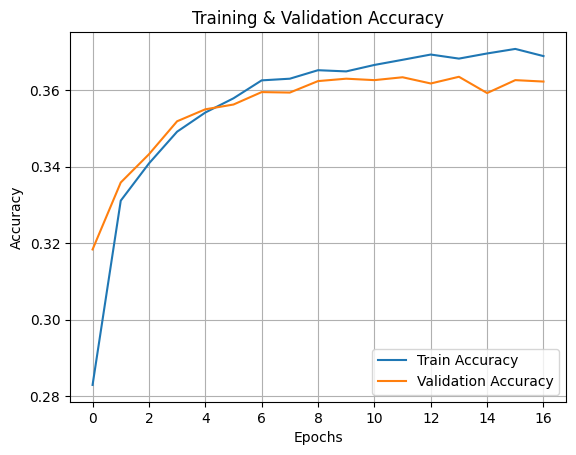

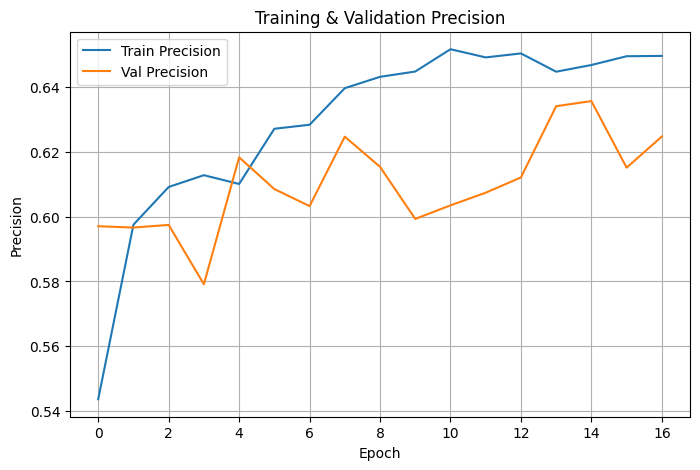

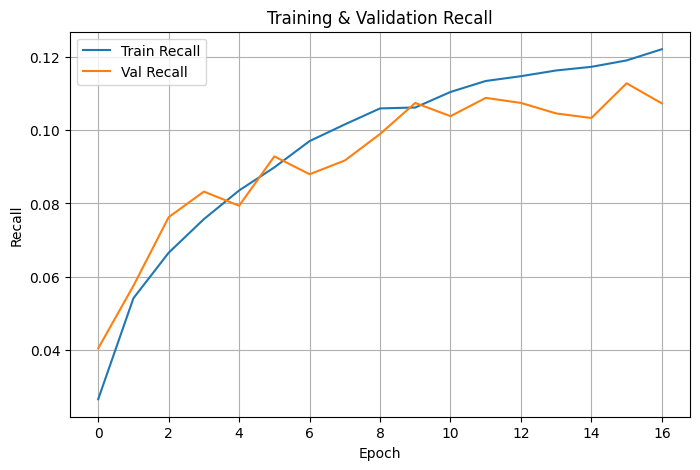

In [149]:
plt.plot(history_f2_2nd_test.history['accuracy'], label='Train Accuracy')
plt.plot(history_f2_2nd_test.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_f2_2nd_test.history['precision'], label='Train Precision')
plt.plot(history_f2_2nd_test.history['val_precision'], label='Val Precision')
plt.title('Training & Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_f2_2nd_test.history['recall'], label='Train Recall')
plt.plot(history_f2_2nd_test.history['val_recall'], label='Val Recall')
plt.title('Training & Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

In [150]:
test_loss, test_acc, test_prec, test_rec = model_f2_2nd_test.evaluate(X_f2_test_scaled, y_f2_test_cat, verbose=0)

print(f"Test Loss:      {test_loss:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall:    {test_rec:.4f}")


# Generate predictions
y_pred_prob_2nd_test = model_f2_2nd_test.predict(X_f2_test_scaled)
y_pred_f2_2nd_test = np.argmax(y_pred_prob_2nd_test, axis=1)
y_2nd_model_test = np.argmax(y_f2_test_df, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_2nd_model_test, y_pred_f2_2nd_test, zero_division=0, target_names=class_names))

Test Loss:      1.8014
Test Accuracy:  0.3662
Test Precision: 0.6467
Test Recall:    0.1144
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
                      precision    recall  f1-score   support

              Africa       0.35      0.46      0.40      1238
           East_Asia       0.47      0.40      0.43      1304
      Eastern_Europe       0.20      0.06      0.09       395
         Middle_East       0.34      0.24      0.28       749
       North_America       0.35      0.26      0.30       817
North_America_Mexico       0.28      0.08      0.13       383
             Oceania       0.26      0.10      0.15       781
       South_America       0.28      0.23      0.25       805
          South_Asia       0.00      0.00      0.00       371
      Southeast_Asia       0.32      0.21      0.25       782
      Western_Europe       0.38      0.71      0.50      2375

            accuracy                           0.37     10000
           macro avg       0.29    

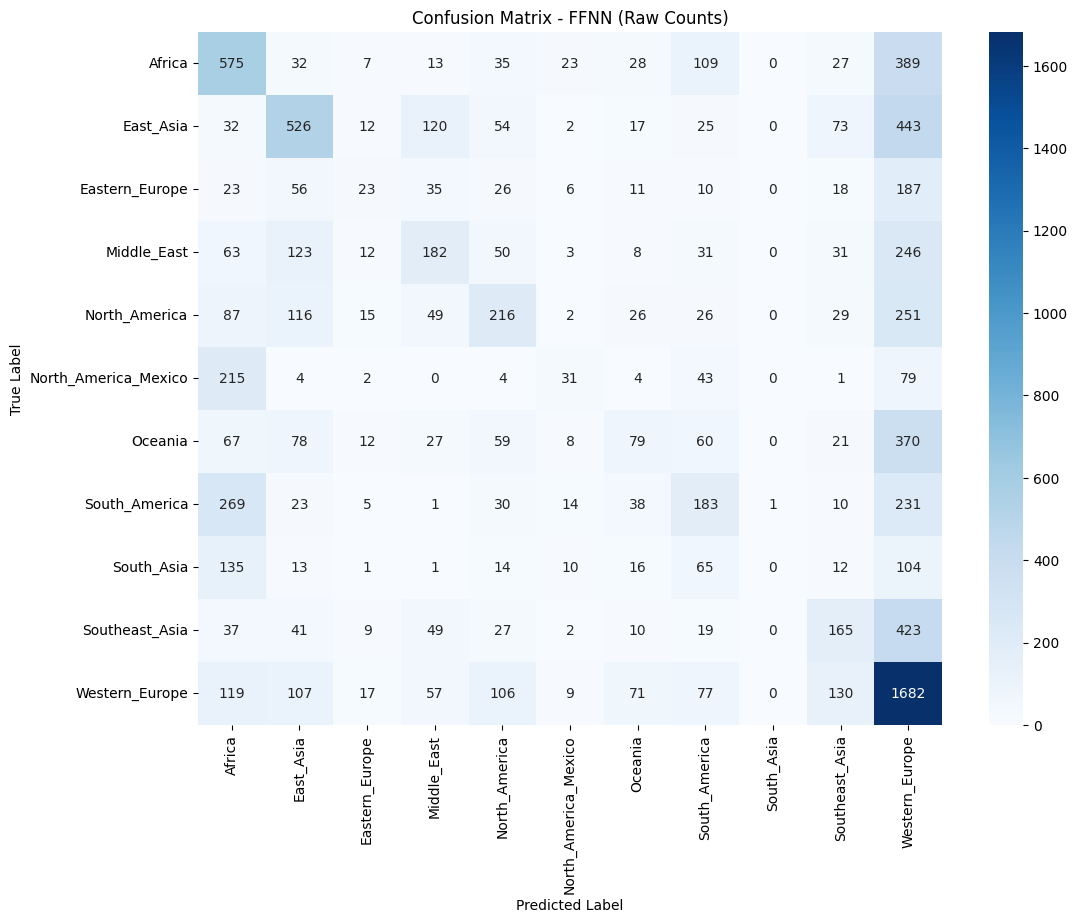

In [151]:
cm = confusion_matrix(y_2nd_model_test, y_pred_f2_2nd_test)

# Plot with annotations
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix - FFNN (Raw Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [152]:
# here will use  deeper model with 2 hidden layers . one layer that has 32 newrons then a layer with 16 newrons 

model_f2_3rd_test = Sequential([
    Input(shape=(X_f2_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # As our output is multi-class
])

model_f2_3rd_test.summary()

model_f2_3rd_test.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

history_f2_3rd_test = model_f2_3rd_test.fit(X_f2_train_scaled, y_f2_train_cat, validation_split=0.2, epochs=50, batch_size=32, verbose=1, callbacks=[early_stop])

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 32)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 11)             │           187 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,931 (7.54 KB)

 Trainable params: 1,931 (7.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2588 - loss: 2.2019 - precision: 0.4484 - recall: 0.0132 - val_accuracy: 0.3236 - val_loss: 1.9771 - val_precision: 0.5812 - val_recall: 0.0550
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3294 - loss: 1.9463 - precision: 0.6214 - recall: 0.0623 - val_accuracy: 0.3326 - val_loss: 1.9195 - val_precision: 0.6307 - val_recall: 0.0627
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3409 - loss: 1.9009 - precision: 0.6196 - recall: 0.0741 - val_accuracy: 0.3426 - val_loss: 1.8839 - val_precision: 0.6124 - val_recall: 0.0899
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3502 - loss: 1.8622 - precision: 0.6237 - recall: 0.0884 - val_accuracy: 0.3491 - val_loss: 1.8629 - val_precision: 0.6269 - val_recall: 0.0815
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3569 - loss: 1.8446 - precision: 0.6469 - recall: 0.1010 - val_accuracy: 0.3548 - va

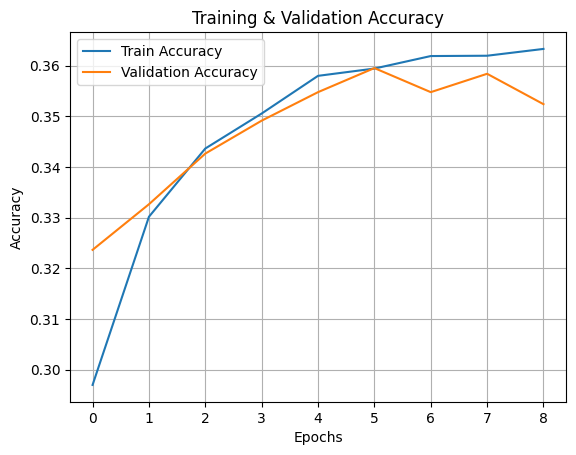

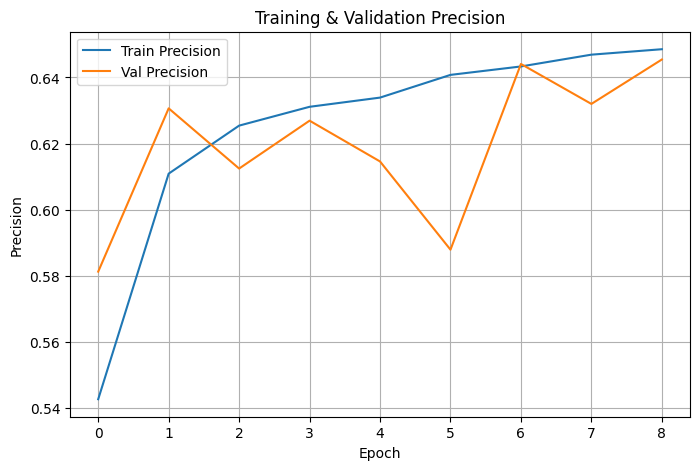

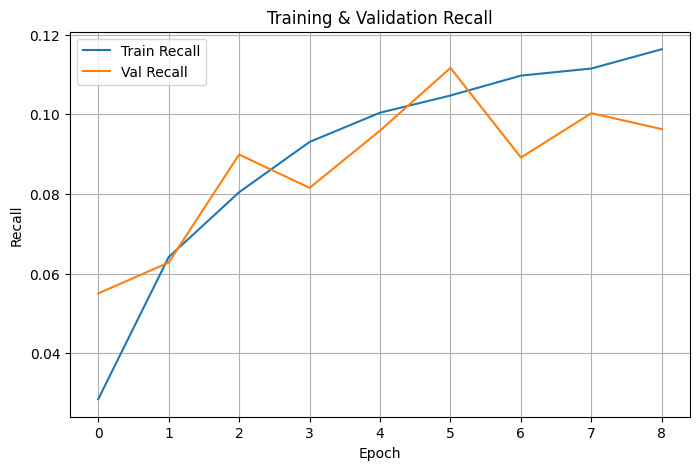

In [153]:
plt.plot(history_f2_3rd_test.history['accuracy'], label='Train Accuracy')
plt.plot(history_f2_3rd_test.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_f2_3rd_test.history['precision'], label='Train Precision')
plt.plot(history_f2_3rd_test.history['val_precision'], label='Val Precision')
plt.title('Training & Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_f2_3rd_test.history['recall'], label='Train Recall')
plt.plot(history_f2_3rd_test.history['val_recall'], label='Val Recall')
plt.title('Training & Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

In [154]:
test_loss, test_acc, test_prec, test_rec = model_f2_3rd_test.evaluate(X_f2_test_scaled, y_f2_test_cat, verbose=0)

print(f"Test Loss:      {test_loss:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall:    {test_rec:.4f}")

# Generate predictions
y_pred_prob_3rd_test = model_f2_3rd_test.predict(X_f2_test_scaled)
y_pred_f2_3rd_test = np.argmax(y_pred_prob_3rd_test, axis=1)
y_3rd_model_test = np.argmax(y_f2_test_cat, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_3rd_model_test, y_pred_f2_3rd_test, zero_division=0, target_names=class_names))

Test Loss:      1.8291
Test Accuracy:  0.3654
Test Precision: 0.6216
Test Recall:    0.1204
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
                      precision    recall  f1-score   support

              Africa       0.34      0.47      0.40      1238
           East_Asia       0.47      0.41      0.44      1304
      Eastern_Europe       0.13      0.01      0.02       395
         Middle_East       0.32      0.22      0.26       749
       North_America       0.38      0.19      0.26       817
North_America_Mexico       0.15      0.01      0.02       383
             Oceania       0.24      0.08      0.12       781
       South_America       0.27      0.19      0.22       805
          South_Asia       0.00      0.00      0.00       371
      Southeast_Asia       0.46      0.15      0.22       782
      Western_Europe       0.37      0.79      0.50      2375

            accuracy                           0.37     10000
           macro avg       0.28    

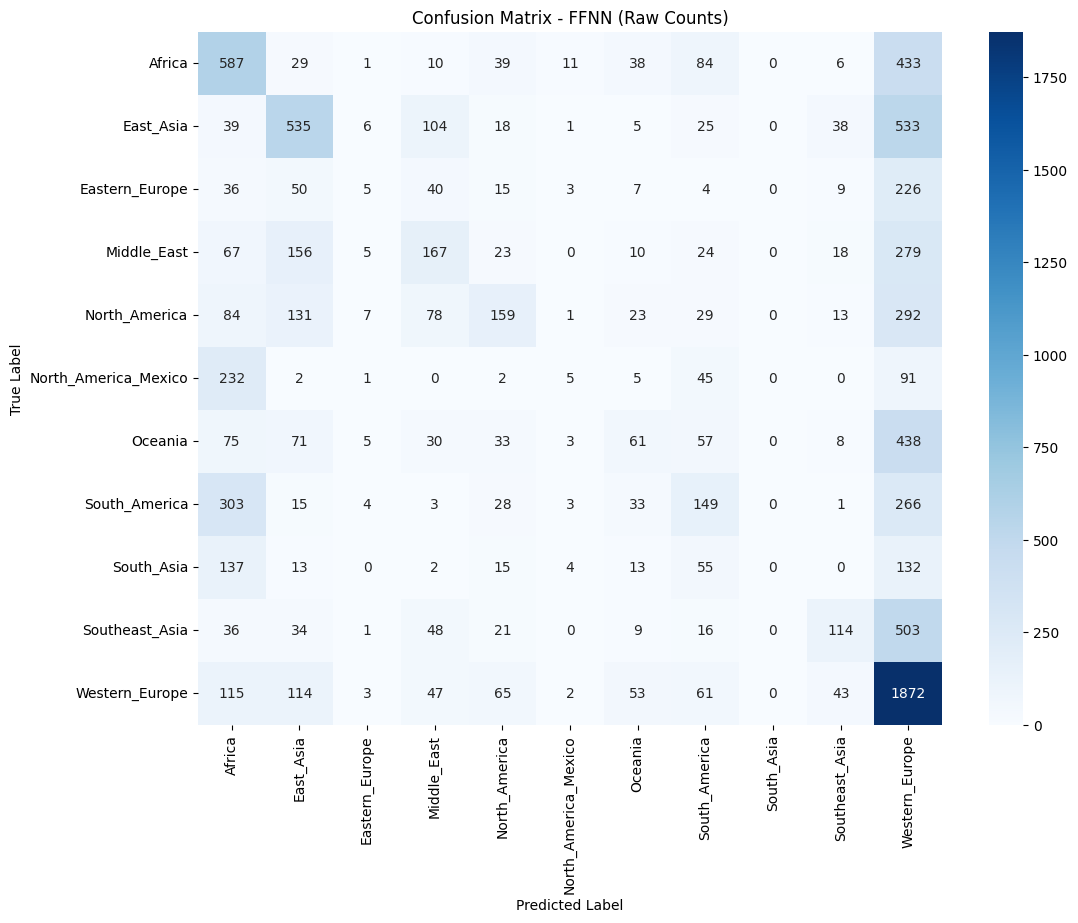

In [155]:
cm = confusion_matrix(y_3rd_model_test, y_pred_f2_3rd_test)

# Plot with annotations
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix - FFNN (Raw Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# The inferenece function :

In [156]:
# this is a setup for the infernece function

unique_age_groups = df['age_group'].dropna().unique().astype(str)
le_age = LabelEncoder()
le_age.fit(unique_age_groups)
print("LabelEncoder for age_group fitted.")
print(f"Learned classes: {le_age.classes_}")
# we used a new label encoder for age_groups as when we tried to use the same label encoder at the beggining of the notebook , it showed an error 
# so to avoid any errors , wer used a new encoder but made sure it encodes the age group in the same way as we did before 

scaler_inf = scaler_ffnn # this is the same scaler used when we scaled feature_list 2 for the model 
model_inf = model_f2_2nd_test # this is the model we chose 

model_inf.summary() 

column_order_inf = X_encoded_columns_for_ffnn_inference 

# Verification
# this block was added because we were facing a lot of errors in this setup cell 
try:
    print("Step 4 Complete: Column order assigned.")
    print(f"   Number of columns captured: {len(column_order_inf)}")
    # Compare with scaler if available
    if 'scaler_inf' in locals() and hasattr(scaler_inf, 'n_features_in_'):
        if len(column_order_inf) == scaler_inf.n_features_in_:
            print(f"   Column count matches scaler expectation ({scaler_inf.n_features_in_}). ")
        else:
            print(f"!! MISMATCH WARNING: Column count ({len(column_order_inf)}) doesn't match scaler ({scaler_inf.n_features_in_}) !!")
except NameError:
    print("ERROR: 'X_encoded_columns_for_ffnn_inference' not found. Please ensure it's defined.")
except TypeError:
    print("ERROR: 'column_order_inf' is not a list. Check the variable assignment.")


class_names_inf = class_names
# those are the names of all country_groups 

print("The captured target class names are:")
print(class_names_inf)
print(f"\nTotal classes: {len(class_names_inf)}")


LabelEncoder for age_group fitted.
Learned classes: ['18-24' '25-34' '35-44' '45-54' '55+']


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 32)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,739 (18.52 KB)

 Trainable params: 1,579 (6.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,160 (12.35 KB)

Step 4 Complete: Column order assigned.
   Number of columns captured: 37
   Column count matches scaler expectation (37). 
The captured target class names are:
['Africa', 'East_Asia', 'Eastern_Europe', 'Middle_East', 'North_America', 'North_America_Mexico', 'Oceania', 'South_America', 'South_Asia', 'Southeast_Asia', 'Western_Europe']

Total classes: 11


In [157]:
def predict_country_group_ffnn_simplified(raw_input_dict):
    

    # Check if necessary objects are loaded
    required_objects = ['le_age', 'scaler_inf', 'model_inf', 'column_order_inf', 'class_names_inf']
    if not all(obj in globals() and globals()[obj] is not None for obj in required_objects):
        print("ERROR: Not all required objects loaded. Run setup cell first.")
        return None

    print("--- Starting Inference ---")

    # 1. Convert input dict to DataFrame
    input_df = pd.DataFrame([raw_input_dict])
    print("\n1. Input DataFrame:")
    print(input_df.to_string())

    # --- 2. Preprocess ---

    # a) Label Encode 'age_group'
    input_age_group = input_df['age_group'].iloc[0]
    print(f"\n2a. Processing age_group: '{input_age_group}'")
    try:
        if input_age_group in le_age.classes_:
             encoded_age = le_age.transform([input_age_group])[0]
             input_df['age_group_encoded'] = encoded_age
             print(f"   -> Encoded as: {encoded_age}")
        else:
             print(f"   -> WARNING: Age group '{input_age_group}' not seen. Assigning -1.")
             input_df['age_group_encoded'] = -1
    except Exception as e:
        print(f"   -> ERROR during age encoding: {e}. Assigning -1.")
        input_df['age_group_encoded'] = -1

    # b) One-Hot Encode relevant columns 
    cols_to_encode = ['user_gender', 'traveller_type', 'user_country']
    print(f"\n2b. One-Hot Encoding: {cols_to_encode}")
    input_df_encoded = pd.get_dummies(input_df, columns=cols_to_encode, drop_first=True)

    # c) Reindex columns like training data
    print(f"\n2c. Reindexing to match {len(column_order_inf)} training columns...")
    input_df_reindexed = input_df_encoded.reindex(columns=column_order_inf, fill_value=0)

    # d) Scale using the fitted scaler
    print("\n2d. Scaling data...")
    input_scaled = scaler_inf.transform(input_df_reindexed.values)

    # Predict using the FFNN Model
    print("\n3. Predicting using FFNN...")
    probabilities = model_inf.predict(input_scaled)

    # Get the final predicted class
    predicted_index = np.argmax(probabilities, axis=1)[0]
    predicted_class_name = class_names_inf[predicted_index]
    print(f"   -> Predicted class index: {predicted_index}, Name: {predicted_class_name}")

    print("\n--- Inference Complete ---")
    return predicted_class_name

print("\nSimplified inference function 'predict_country_group_ffnn_simplified' is defined.")


Simplified inference function 'predict_country_group_ffnn_simplified' is defined.


In [158]:
# Test example 1
sample_input_ffnn = {
    'score_overall': 6.0,
    'score_cleanliness': 1.0,
    'score_comfort': 8.5,
    'score_facilities': 9.0,
    'score_location': 9.0,
    'score_staff': 9.0,
    'score_value_for_money': 9.0,
    'user_country': 'United Kingdom', 
    'user_gender': 'Male',
    'traveller_type': 'Solo',
    'age_group': '18-24'
}

print("\n--- Testing Simplified Inference Function ---")
predicted_group = predict_country_group_ffnn_simplified(sample_input_ffnn)

print(f"\nExample Input Data:\n{sample_input_ffnn}")
print(f"\nPredicted Country Group: {predicted_group}")


--- Testing Simplified Inference Function ---
--- Starting Inference ---

1. Input DataFrame:
   score_overall  score_cleanliness  score_comfort  score_facilities  score_location  score_staff  score_value_for_money    user_country user_gender traveller_type age_group
0            6.0                1.0            8.5               9.0             9.0          9.0                    9.0  United Kingdom        Male           Solo     18-24

2a. Processing age_group: '18-24'
   -> Encoded as: 0

2b. One-Hot Encoding: ['user_gender', 'traveller_type', 'user_country']

2c. Reindexing to match 37 training columns...

2d. Scaling data...

3. Predicting using FFNN...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
   -> Predicted class index: 5, Name: North_America_Mexico

--- Inference Complete ---

Example Input Data:
{'score_overall': 6.0, 'score_cleanliness': 1.0, 'score_comfort': 8.5, 'score_facilities': 9.0, 'score_location': 9.0, 'score_staff': 9.0, 'score_value_for_money': 9.0, 'user_country': 

In [159]:
# Test example 2
sample_input_ffnn = {
    'score_overall': 6.0,
    'score_cleanliness': 1.0,
    'score_comfort': 1.5,
    'score_facilities': 1.0,
    'score_location': 1.0,
    'score_staff': 1.0,
    'score_value_for_money': 9.0,
    'user_country': 'United Kingdom', 
    'user_gender': 'Female',
    'traveller_type': 'Solo',
    'age_group': '18-24'
}

print("\n--- Testing Simplified Inference Function ---")
predicted_group = predict_country_group_ffnn_simplified(sample_input_ffnn)

print(f"\nExample Input Data:\n{sample_input_ffnn}")
print(f"\nPredicted Country Group: {predicted_group}")


--- Testing Simplified Inference Function ---
--- Starting Inference ---

1. Input DataFrame:
   score_overall  score_cleanliness  score_comfort  score_facilities  score_location  score_staff  score_value_for_money    user_country user_gender traveller_type age_group
0            6.0                1.0            1.5               1.0             1.0          1.0                    9.0  United Kingdom      Female           Solo     18-24

2a. Processing age_group: '18-24'
   -> Encoded as: 0

2b. One-Hot Encoding: ['user_gender', 'traveller_type', 'user_country']

2c. Reindexing to match 37 training columns...

2d. Scaling data...

3. Predicting using FFNN...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
   -> Predicted class index: 0, Name: Africa

--- Inference Complete ---

Example Input Data:
{'score_overall': 6.0, 'score_cleanliness': 1.0, 'score_comfort': 1.5, 'score_facilities': 1.0, 'score_location': 1.0, 'score_staff': 1.0, 'score_value_for_money': 9.0, 'user_country': 'United Kingdo

# XAI 

# Shap :

In [160]:
shap.initjs()
# Initialize SHAP 

--- Initializing SHAP Explainer ---
--- Generating SHAP Summary Plots (Per Class) ---


The figure layout has changed to tight


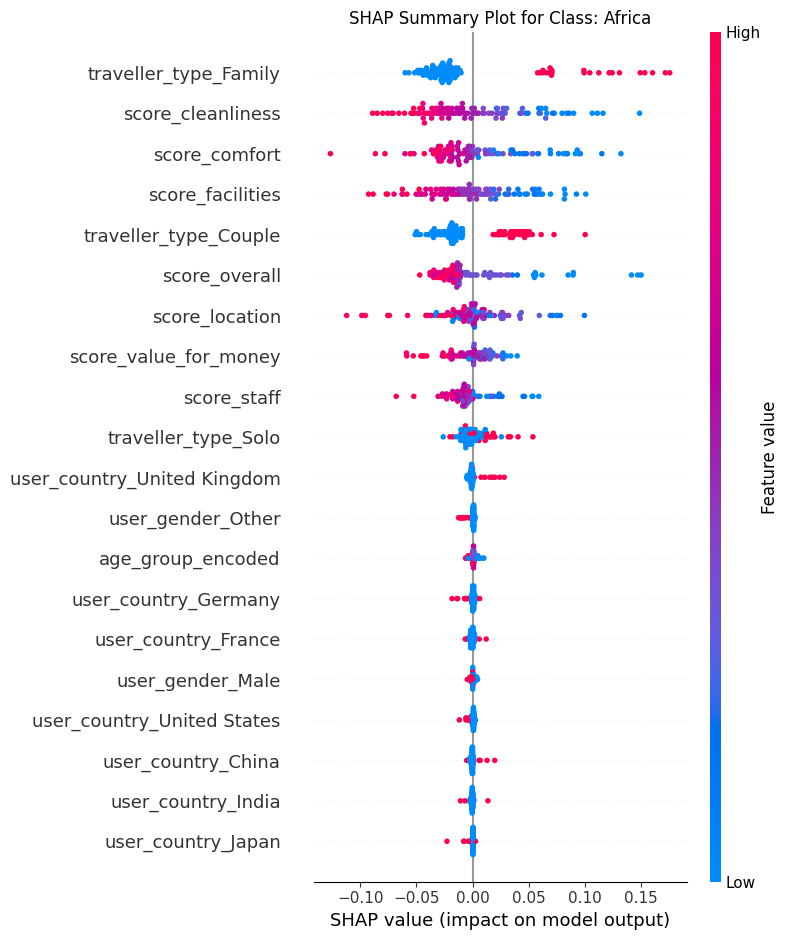

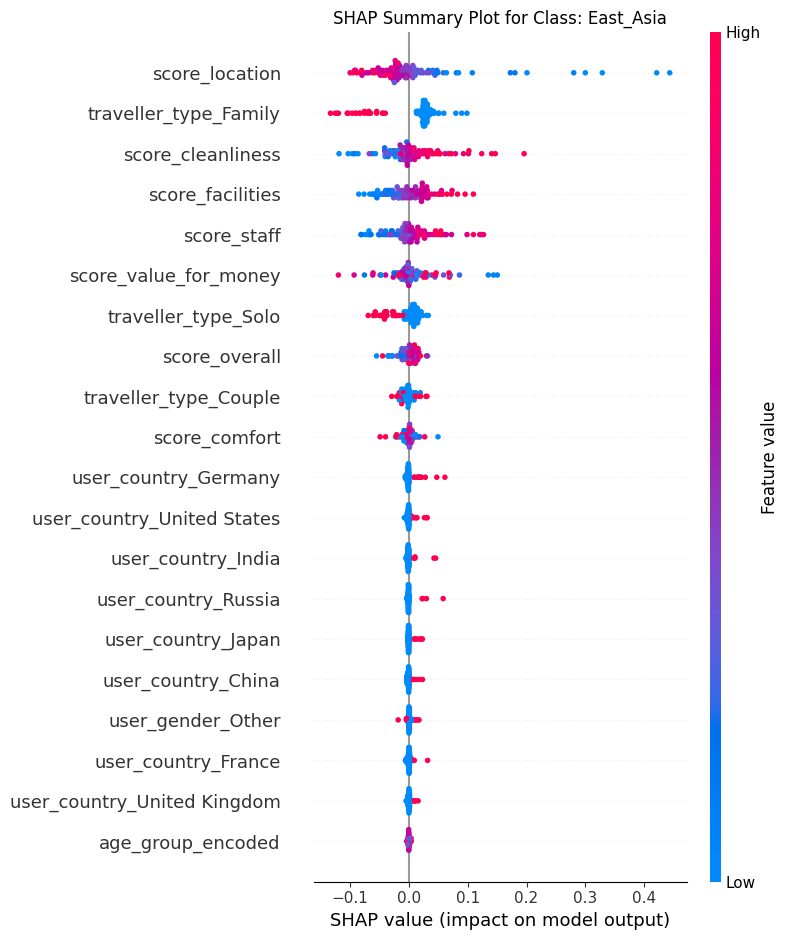

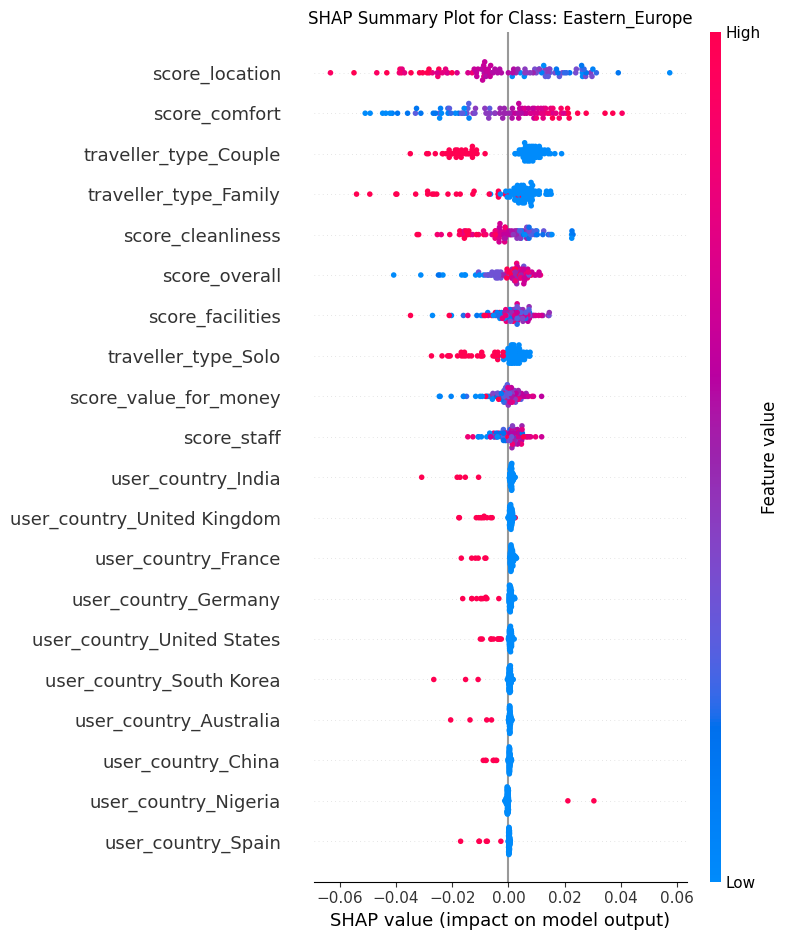

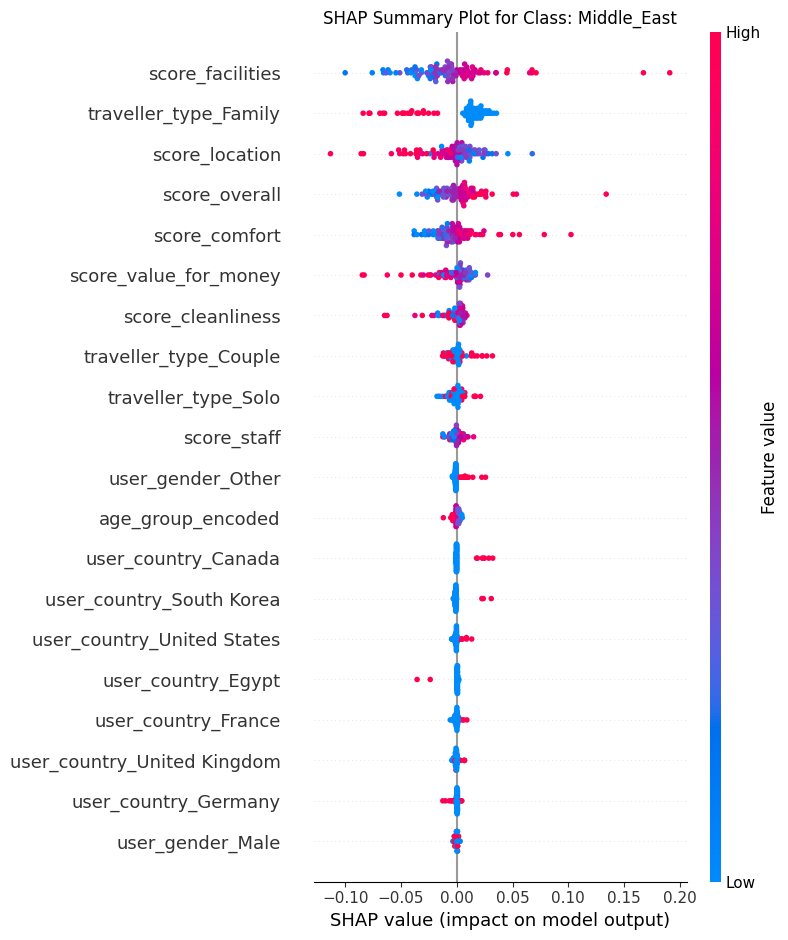

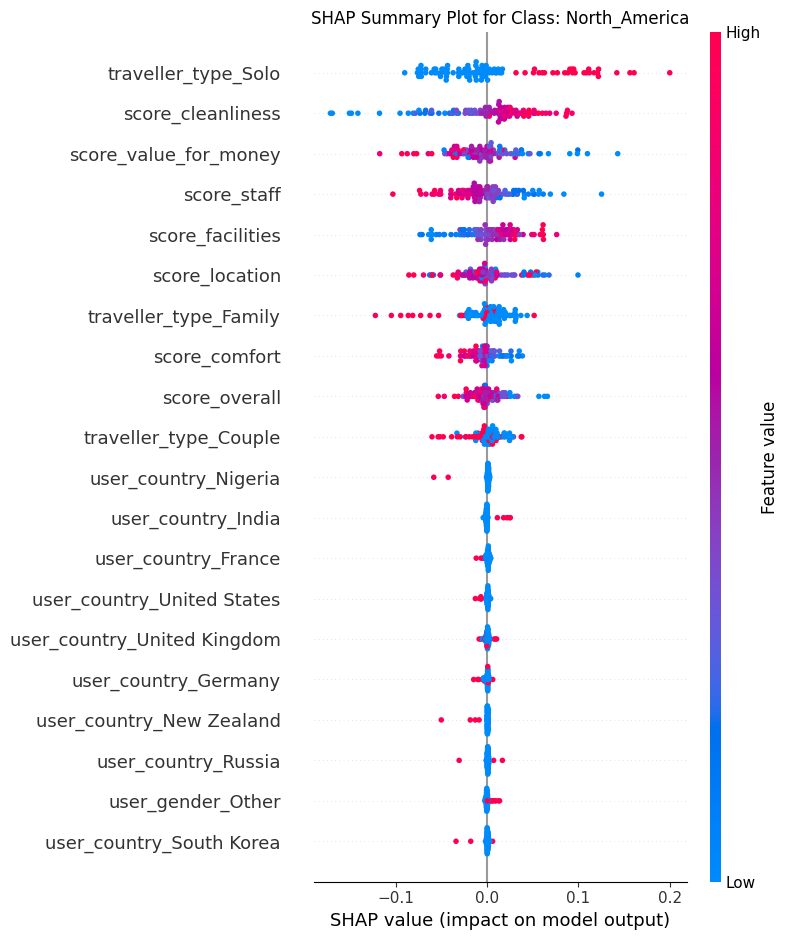

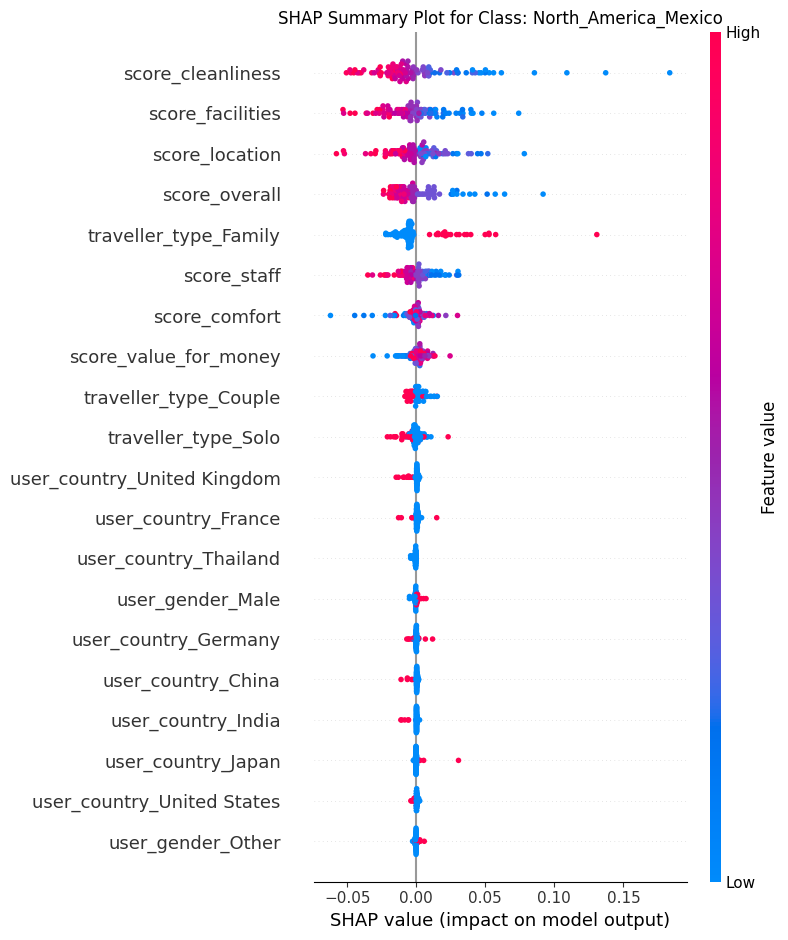

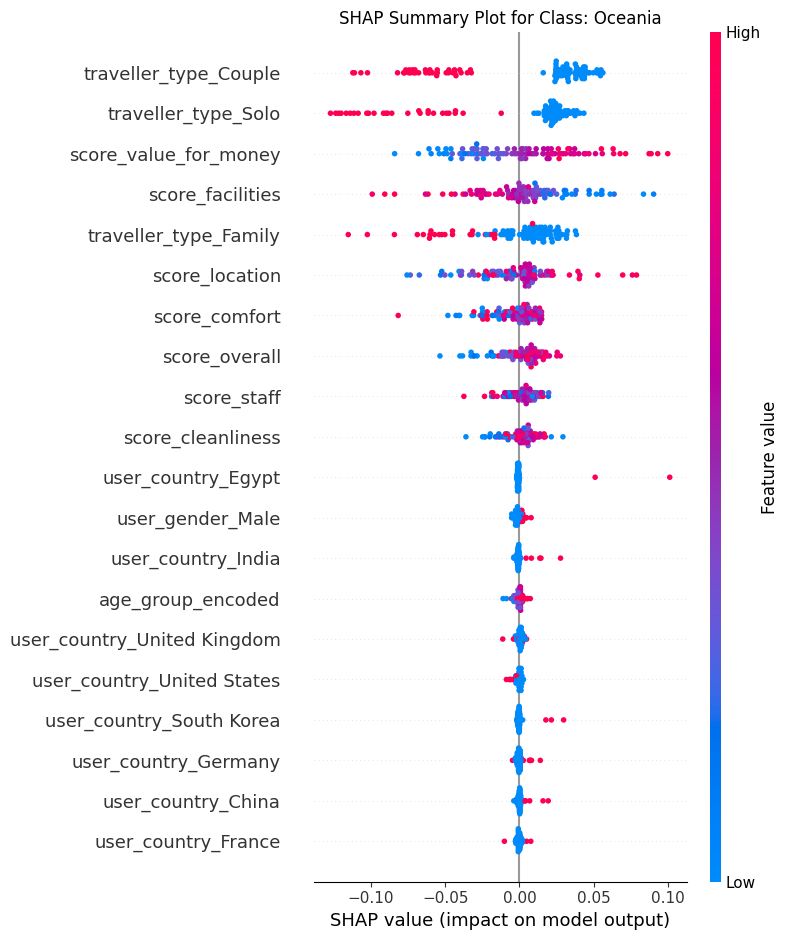

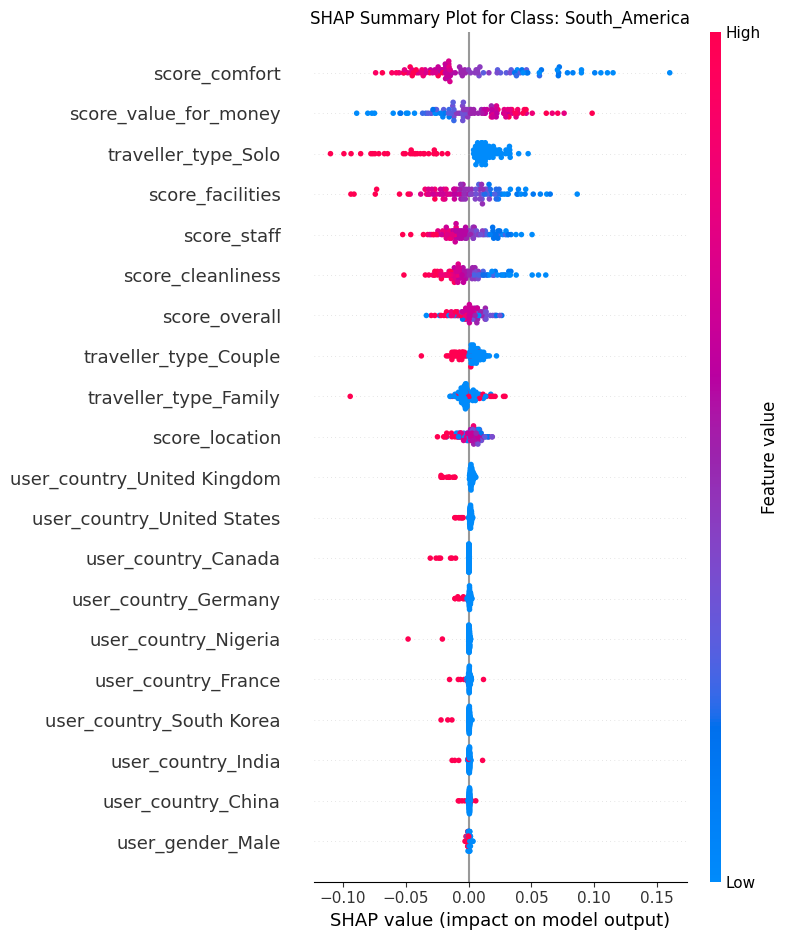

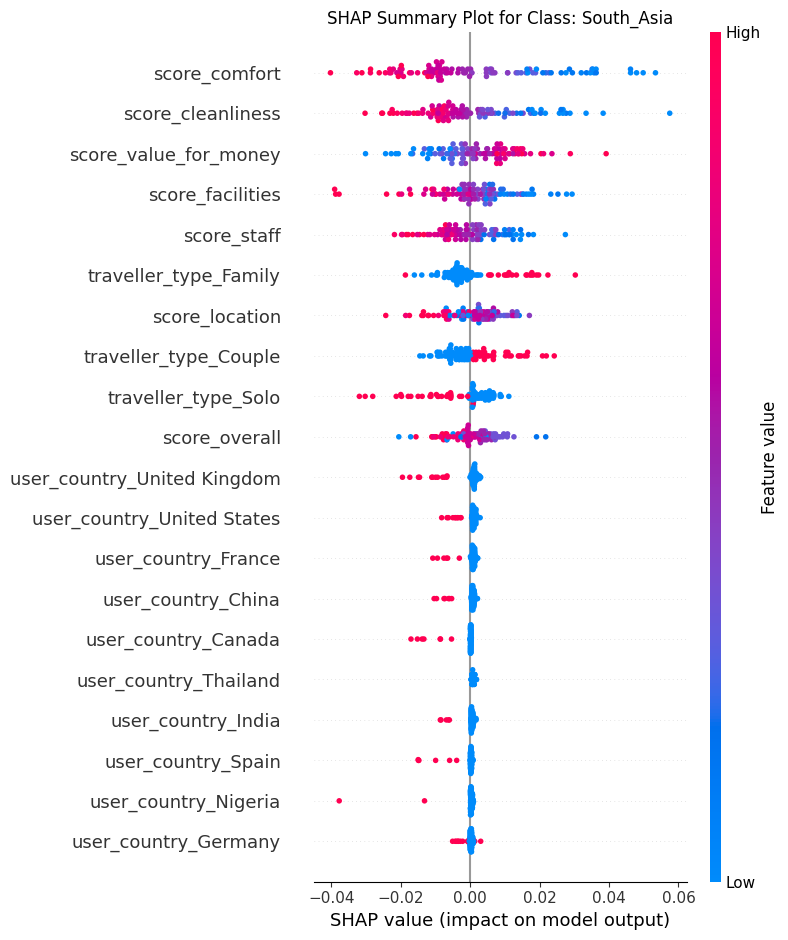

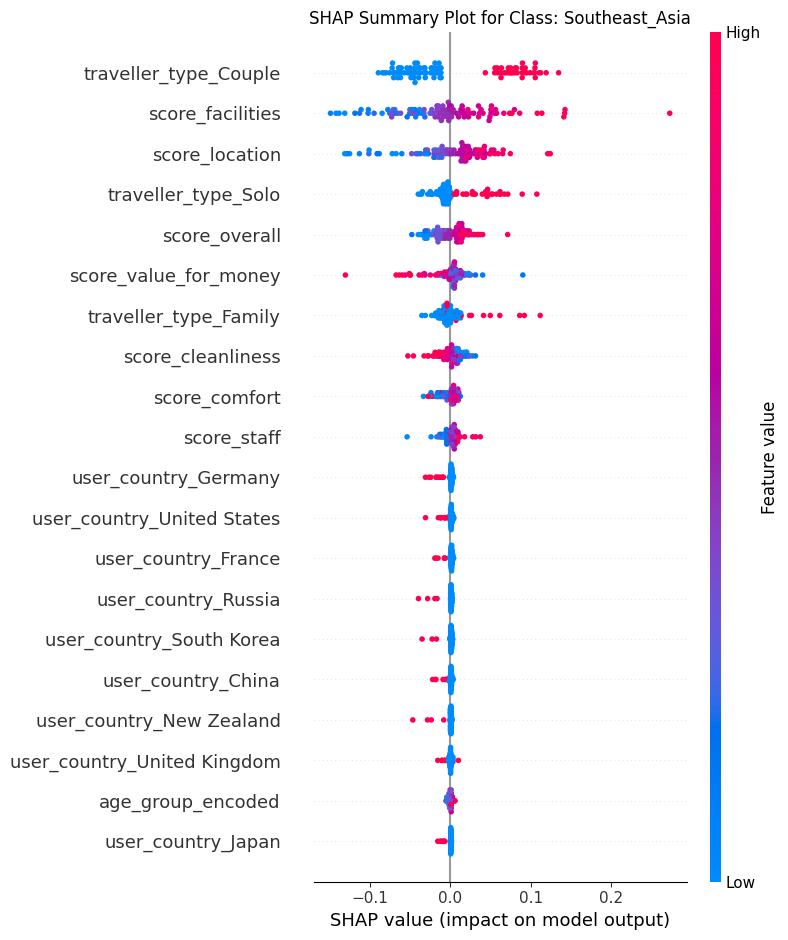

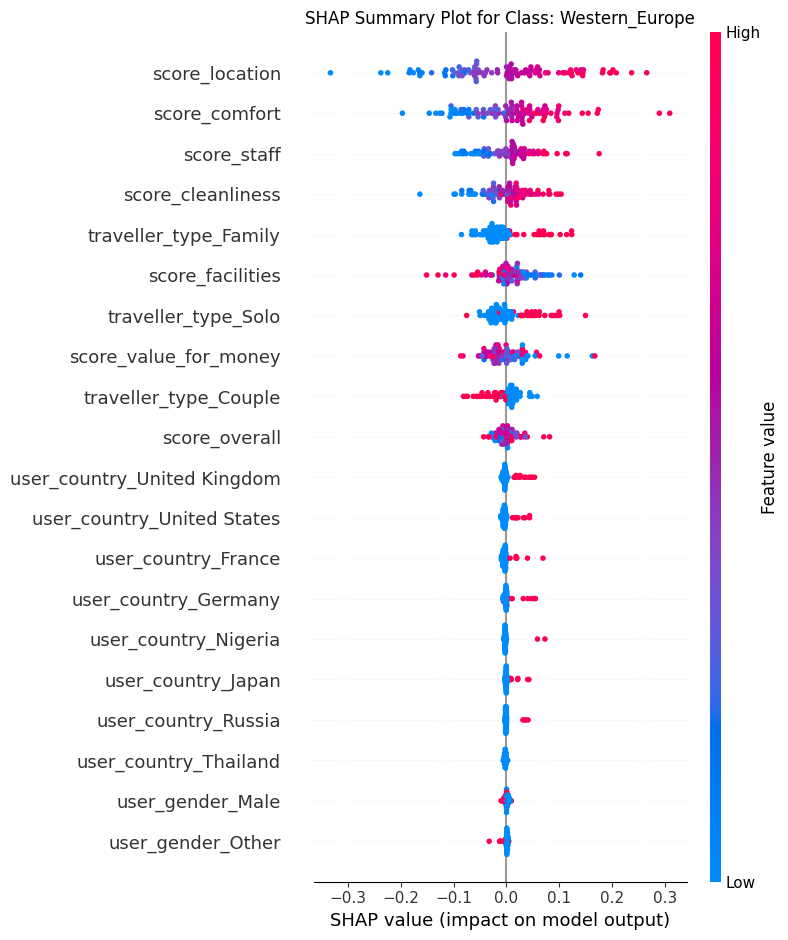

In [161]:
# Prepare Data 
background = shap.sample(X_f2_train_scaled, 100) 
X_f2_test_sample = shap.sample(X_f2_test_scaled, 100)
# here we used a sample of only 100 rows because If we give shap all the dataset , it will run for a ver long time


# Use the correct feature and class names 
correct_feature_names = X_f2_ffnn_encoded.columns.tolist() 
correct_class_names = class_names 

print("--- Initializing SHAP Explainer ---")

# Initialize the explainer and create the Explanation object 
explainer = shap.Explainer(model_f2_2nd_test, background)
shap_explanation = explainer(X_f2_test_sample)

print("--- Generating SHAP Summary Plots (Per Class) ---")


# unlike the lab , here we have a multi-classification problem which means we have to plot a graph for each class (country_group) to be able to see the effect of multiple features on the classes
# We loop through each class to generate its own summary plot 
for i, class_name in enumerate(correct_class_names):
    
    
    shap.summary_plot(
        shap_explanation[:, :, i], # Slicing handles everything automatically
        feature_names=correct_feature_names,
        show=False
    )
    
    # Add a title and show the plot
    plt.title(f"SHAP Summary Plot for Class: {class_name}")
    plt.tight_layout()
    plt.show()

In [162]:
# Define Prediction Function for LIME 
def lime_predict_fn(x):
    x_float = np.asarray(x).astype('float32')
    return model_f2_2nd_test.predict(x_float)

# Initialize LIME Explainer 
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_f2_train_scaled,
    feature_names=X_encoded_columns_for_ffnn_inference, # This will get the Feature names after encoding
    class_names=correct_class_names, # this will give me a List of country group names 
    mode='classification',
    discretize_continuous=True
)
print("LIME explainer initialized.")

#  Explain a Single Instance 
i = 1  # Index of the instance in the test set we want to explain
instance_data_scaled = X_f2_test_scaled[i]
num_total_features = X_f2_train_scaled.shape[1] # get the total feature count so we can use it later 

#  Get the predicted class name to display
instance_data_reshaped = instance_data_scaled.reshape(1, -1)
probabilities = model_f2_2nd_test.predict(instance_data_reshaped)
predicted_index = np.argmax(probabilities, axis=1)[0]
predicted_class_name = correct_class_names[predicted_index]
print(f"\nExplaining instance {i}. Model predicted: '{predicted_class_name}' (Index: {predicted_index})")

# Generate the LIME explanation
# we want to see the explanation not for all classes but the predicted class for this specfic row
#  so top_labels=1 will explain only the predicted class
exp = explainer_lime.explain_instance(
    data_row=instance_data_scaled,
    predict_fn=lime_predict_fn,
    num_features=num_total_features, # Show all features
    top_labels=1 # this will explain only the top class
)
print("LIME explanation generated for the predicted class.")

# Display Explanation using show_in_notebook 
print(f"\nShowing LIME explanation for the predicted class ({predicted_class_name}):")
exp.show_in_notebook(show_table=True, show_all=True) # show_all=True ensures all features are in the table

LIME explainer initialized.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Explaining instance 1. Model predicted: 'Western_Europe' (Index: 10)
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
LIME explanation generated for the predicted class.

Showing LIME explanation for the predicted class (Western_Europe):
